<center><font size="+4">Financial risk and sustainability rating</font></center>
<center><font size="+3">Full day training in Python - 2022/2023</font></center>
<br/>
<center><font size="+2">POLIMI Graduate School of Management</font></center>
<center><font size="+2">Milan, Italy</font></center><br/>

<center><font size="+2">Course responsible</font></center>
<center><font size="+1">
    &nbsp;&nbsp;
    <a href="https://www.santannapisa.it/en/andrea-vandin">Andrea Vandin</a> &nbsp; a.vandin@santannapisa.it</font></center>

<center><img src="https://github.com/EMbeDS-education/Python-for-Financial-risk-and-sustainability-rating/raw/main/jupyter/jupyterNotebooks/images/SSSAsimple.png" width="700" alt="EMbeDS"></center>

---
---

<center><font size="+4">Advanced Libraries for</font></center>
<center><font size="+4">data manipulation/visualization</font></center>
<center><font size="+2">with applications to financial and COVID'19 data</font></center>

---

# Preliminaries

## What is the goal of this notebook?

* We give a gentle overview of advanced Python libraries for data processing.
  * You can see this notebook as a first place to look at when you need to use such libraries.
  * It also contains examples and references to further material

## What is this notebook about?

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

---

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

We are going to show https://github.com/EMbeDS-education/Python-for-Financial-risk-and-sustainability-rating/raw/main/jupyter/jupyterNotebooks/images/pythoncpp.jpeg


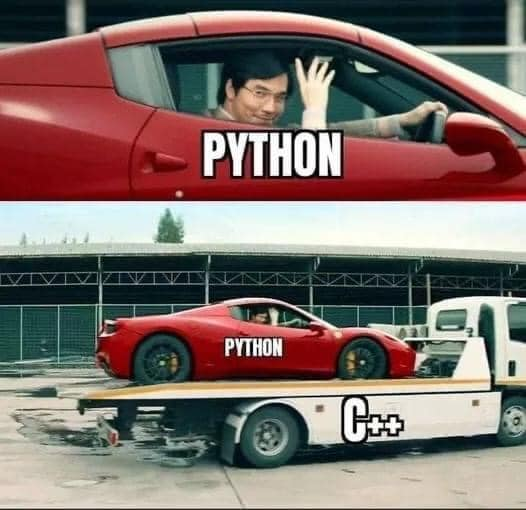

In [1]:
url_github_repo="https://github.com/EMbeDS-education/Python-for-Financial-risk-and-sustainability-rating/raw/main/"
from IPython.display import Image, display
image_path=url_github_repo+'jupyter/jupyterNotebooks/images/pythoncpp.jpeg'
print('We are going to show',image_path)
img=Image(image_path,width=700)
display(img)

## Install and import the NumPy module
The first time you run this notebook you might have to install numpyPandas using the following script:

In [2]:
#%pip install --upgrade pip
%pip install numpy

You should consider upgrading via the '/Users/andrea/Library/CloudStorage/OneDrive-ScuolaSuperioreSant'Anna/SSSA_OneDrive/Teaching/20222023/Polimi/env_python_polimi_2023/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


After installing a module (only once), you should import it (everytime)
- The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [3]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done 
       - element-wise iterating over the elements of the arrays 
       - _at C level rather than at Python level_, obtaining better performances. 
     - We get a concise syntax
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In general, operations on arrays should be done on arrays with same _dimensions_
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

## The NumPy ndarray: A Multidimensional Array

### Performance comparison Numpy ndarrays vs Python lists

In [4]:
l=[1,2,3]
print('l is a',type(l))
l

l is a <class 'list'>


[1, 2, 3]

In [5]:
l[2]

3

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [6]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))
np_arr
#py_list

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


array([      0,       1,       2, ..., 4999997, 4999998, 4999999])

Let's compute the square value of each element in the array/list

In [7]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 9.22 ms, sys: 25.2 ms, total: 34.4 ms
Wall time: 12.2 ms

Test Python list comprehension
CPU times: user 1.33 s, sys: 186 ms, total: 1.52 s
Wall time: 1.35 s

Test Python list iteration
CPU times: user 1.77 s, sys: 38 ms, total: 1.81 s
Wall time: 1.81 s

Tests completed


### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [8]:
#We have already imported numpy in a cell above
#import numpy as np

# Generate a 2x3 matrix with random data in the interval [0,1)
data = np.random.rand(2, 3)
data

array([[0.39276601, 0.61373111, 0.47295377],
       [0.22996184, 0.12123623, 0.54846168]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [9]:
data * 10

array([[3.92766012, 6.13731105, 4.72953773],
       [2.29961843, 1.21236235, 5.48461684]])

In [10]:
data + data

array([[0.78553202, 1.22746221, 0.94590755],
       [0.45992369, 0.24247247, 1.09692337]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [11]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the provided data

In [12]:
data1 = [6, 7.5, 8, 0, 1]
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
(5,)
float64


__Why do we get `6.` and not `6`?__

List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [13]:
data2 = [ [1, 2, 3, 4], 
          [5, 6, 7, 8]
        ]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [14]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory
    - `stop` does not belong to the range
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space
     - while python's `range` does not occupy much space

In [15]:
np.ones((3, 6))+1

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [16]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


In [17]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [18]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
print(arr1)
arr2 = np.array([1.1, 2.1, 3.1], dtype=np.int32)
print(arr2)
print(arr1.dtype)
print(arr2.dtype)

[1. 2. 3.]
[1 2 3]
float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [19]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [20]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays have `indexing` and `slicing` capabilities of lists

In [21]:
arr = np.arange(10)
print('arr',arr)
print('You can index single entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can index single entries:
arr[0] is 0
arr[5] is 5


In [22]:
arr2=arr

In [23]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])
view58=arr[5:8]
view58

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


array([5, 6, 7])

In [24]:
view58

array([5, 6, 7])

In [25]:
#view58[0]=1000
#view58

In [26]:
#arr

In [27]:
#arr[9]
#arr[len(arr)-1]
arr[-1]

9

In [28]:
arr[-2]

8

A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
  - The original array is changed as well!
* **Beware**: no data is copied

In [29]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or, again, _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [30]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [31]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    12 12345    12     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [32]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [33]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [34]:
arr1d[2]

3

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [35]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
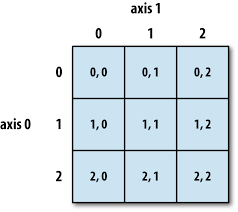

This is an example for 2-dimensional arrays
* It works similarly for higher dimensions...

##### Nerdish digression on higher-dimensional slicing left for reference but not touched in class

**BEWARE**
- When __indexing__, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When __silicing__, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

##### Higher dimensional slicing

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [36]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

Further examples of indexing/slicing of higher dimensional arrays

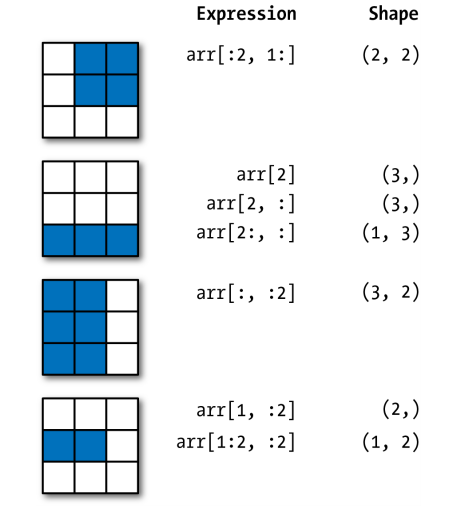

In [38]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [39]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Assigning to a slice expression assigns to the whole selection by broadcasting

In [40]:
arr2d[:2, 1:] = 0 
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [41]:
arr2d[:2, 1:] = [[1,2],[2,4]]
arr2d

array([[1, 1, 2],
       [4, 2, 4],
       [7, 8, 9]])

### Select entries that satisfy a guard

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [42]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[-0.52472028 -0.98640132  0.19829055 -0.43531493]
 [ 0.08831878 -0.36470718  0.58084356  0.55426733]
 [ 0.6327569  -0.55369241  0.86978024  0.78560818]
 [-0.08326506  1.51045401  1.33131365  0.19282461]
 [-0.13971593  0.82979069  0.18307584  0.55858248]
 [ 0.84949861  0.11940726 -0.17005432 -0.1604226 ]
 [ 0.1679167   1.36445957  1.64988248  1.27715049]]


We first see how to create a _mask_

In [43]:
data > 0

array([[False, False,  True, False],
       [ True, False,  True,  True],
       [ True, False,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True]])

Now we use the mask to access the entries of interest

In [44]:
data2=data[ data > 0 ]
print('Data2\n',data2)
data2.shape

Data2
 [0.19829055 0.08831878 0.58084356 0.55426733 0.6327569  0.86978024
 0.78560818 1.51045401 1.33131365 0.19282461 0.82979069 0.18307584
 0.55858248 0.84949861 0.11940726 0.1679167  1.36445957 1.64988248
 1.27715049]


(19,)

> This will actually _copy_ your data
> - You get a __new 1-dimensional array__ containing the elements matching the condition

In [45]:
data2[0]=100
data

array([[-0.52472028, -0.98640132,  0.19829055, -0.43531493],
       [ 0.08831878, -0.36470718,  0.58084356,  0.55426733],
       [ 0.6327569 , -0.55369241,  0.86978024,  0.78560818],
       [-0.08326506,  1.51045401,  1.33131365,  0.19282461],
       [-0.13971593,  0.82979069,  0.18307584,  0.55858248],
       [ 0.84949861,  0.11940726, -0.17005432, -0.1604226 ],
       [ 0.1679167 ,  1.36445957,  1.64988248,  1.27715049]])

In [46]:
data2

array([1.00000000e+02, 8.83187797e-02, 5.80843562e-01, 5.54267328e-01,
       6.32756897e-01, 8.69780238e-01, 7.85608177e-01, 1.51045401e+00,
       1.33131365e+00, 1.92824609e-01, 8.29790692e-01, 1.83075841e-01,
       5.58582480e-01, 8.49498606e-01, 1.19407264e-01, 1.67916700e-01,
       1.36445957e+00, 1.64988248e+00, 1.27715049e+00])

How can I get elements within an interval?
- Or, in general, that satisfy a complex condition?

In [47]:
(data > 0) & (data < 0.5) 

array([[False, False,  True, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [48]:
data3=data[ (data > 0) & (data < 0.5) ]
print('Data3\n',data3)
data3.shape

Data3
 [0.19829055 0.08831878 0.19282461 0.18307584 0.11940726 0.1679167 ]


(6,)

## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- obtaining an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [49]:
data = np.random.randn(7, 4)
data

array([[-0.2829398 , -0.7046229 ,  1.0470166 ,  0.47099995],
       [ 2.03622551,  1.03951436, -0.47162388, -0.76637911],
       [-0.35463413, -2.00682799,  0.99486542,  0.67209776],
       [ 0.09144752, -0.07529521,  0.94217551, -1.68924449],
       [-0.17979328,  0.73474955, -1.12946954, -1.12715535],
       [ 0.20453419, -1.12366054, -1.98244203, -0.30968401],
       [-0.29042455,  1.2029561 ,  0.36282777,  0.1454229 ]])

What numbers are greater than 0?

In [50]:
mask = data > 0
print(mask.dtype)
print(mask.shape)
mask

bool
(7, 4)


array([[False, False,  True,  True],
       [ True,  True, False, False],
       [False, False,  True,  True],
       [ True, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [False,  True,  True,  True]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [51]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[False False  True  True]
 [ True  True False False]
 [False False  True  True]
 [ True False  True False]
 [False  True False False]
 [ True False False False]
 [False  True  True  True]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True  True  True  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [52]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special `T` attribute
* This is just a special reshape
* we compute a view - no actual copy

In [53]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

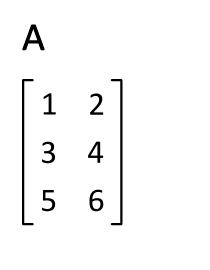

In [54]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [55]:
x = np.ones((2, 3, 4))
print(x)
print('\nThe 3-D matrix has shape \n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

The 3-D matrix has shape 
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [56]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


In [57]:
m1 = np.arange(4).reshape(2,2)
m1

array([[0, 1],
       [2, 3]])

In [58]:
m2 = (np.arange(4)+4).reshape(2,2)
m2

array([[4, 5],
       [6, 7]])

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [59]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [60]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [61]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [62]:
#Sample from the normal distribution
arr = np.random.randn(8)
arr

array([ 1.1436628 ,  0.00804437, -0.88904131,  1.07063998,  0.31391846,
        0.63853582, -0.10522964,  0.75219637])

In [63]:
arr.sort()
arr

array([-0.88904131, -0.10522964,  0.00804437,  0.31391846,  0.63853582,
        0.75219637,  1.07063998,  1.1436628 ])

Multidimensional arrays are sorted for one chosen dimension
E.g. in matrices we can
* Sort across rows
* Sort across columns

In [64]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()

print('Original')
print(arr2d)

print('\n`sort(0)`: Sort the elements within each column (sort across rows)')
arr2d_cp0.sort(axis=0)
print('arr2d.sort(0)')
print(arr2d_cp0)

print('\n`sort(1)`: Sort the elements within each row (sort across columns)')
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

print('\n`sort( )`: Sorts across last axis  ( sort(1), sort across columns)')
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

Original
[[-0.69276475  0.57783529 -0.40974401]
 [-1.00366405 -0.42812798 -0.12703619]
 [ 0.46888071 -1.45626244  0.34004516]
 [-0.8378859  -0.47590054  0.74776191]
 [-0.32407166  0.07229551 -0.04915552]]

`sort(0)`: Sort the elements within each column (sort across rows)
arr2d.sort(0)
[[-1.00366405 -1.45626244 -0.40974401]
 [-0.8378859  -0.47590054 -0.12703619]
 [-0.69276475 -0.42812798 -0.04915552]
 [-0.32407166  0.07229551  0.34004516]
 [ 0.46888071  0.57783529  0.74776191]]

`sort(1)`: Sort the elements within each row (sort across columns)
arr2d.sort(1)
[[-0.69276475 -0.40974401  0.57783529]
 [-1.00366405 -0.42812798 -0.12703619]
 [-1.45626244  0.34004516  0.46888071]
 [-0.8378859  -0.47590054  0.74776191]
 [-0.32407166 -0.04915552  0.07229551]]

`sort( )`: Sorts across last axis  ( sort(1), sort across columns)
arr2d.sort()
[[-0.69276475 -0.40974401  0.57783529]
 [-1.00366405 -0.42812798 -0.12703619]
 [-1.45626244  0.34004516  0.46888071]
 [-0.8378859  -0.47590054  0.74776191]
 [

In [67]:
arr2d.reshape(15).sort()
arr2d.reshape(5,3)

array([[-1.45626244, -1.00366405, -0.8378859 ],
       [-0.69276475, -0.47590054, -0.42812798],
       [-0.40974401, -0.32407166, -0.12703619],
       [-0.04915552,  0.07229551,  0.34004516],
       [ 0.46888071,  0.57783529,  0.74776191]])

### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [69]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with tabular data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation on multi-dimensional data like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
%pip install pandas

#import sys
#!"{sys.executable}" -m pip install pandas

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [70]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [71]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [72]:
print('Series index: ',obj.index)
print('Series values: ',obj.values, 'type:',type(obj.values))

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


Let's now create a Series whose entries are labelled by characters.

In [73]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [74]:
print('Series index: ',obj2.index,'type:',type(obj2.index))
print('Series values: ',obj2.values, 'type:',type(obj2.values))

Series index:  Index(['d', 'b', 'a', 'c'], dtype='object') type: <class 'pandas.core.indexes.base.Index'>
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [76]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[ ['c', 'a', 'd'] ])

obj2['d'] = 
 6
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [77]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [78]:
my_mask= obj2 > 0
my_mask

d     True
b     True
a    False
c     True
dtype: bool

In [79]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


### Create a series, and NaN

You can create a Series using 
- a **dict**ionary 

In [80]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

If you are interested in specific indexes, you can use
- a **dict**ionary 
- and a list as indexes of interest

In [81]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:
- They make a mask!

In [82]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [83]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [84]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A **Series** can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - an excel file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A Series is just a simpler version of a dataframe
  * A DataFrame is a series with 
    - **more main arrays** (one per column), and 
    - **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

> Most of the times, you will be loading data from external resources
> - local/remote CSV/excel files
> - queries on databases
> - webservices
> - ...
>
> Here we first show how to create one programmatically.

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

Essentially we _transpose_ the dictionary

In [107]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [108]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

state  pop nonExistingColumn
0    Ohio  1.5               NaN
1    Ohio  1.7               NaN
2    Ohio  3.6               NaN
3  Nevada  2.4               NaN
4  Nevada  2.9               NaN
5  Nevada  3.2               NaN

In [109]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6 non-null      object 
 1   pop                6 non-null      float64
 2   nonExistingColumn  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [110]:
frame.describe()

pop
count  6.000000
mean   2.550000
std    0.836062
min    1.500000
25%    1.875000
50%    2.650000
75%    3.125000
max    3.600000

If we don't specify columns of interest we load all of them

In [111]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [112]:
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [ ]:
#frame.columns=['stato','anno','popolazione']
#frame

We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [113]:
#frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1 = pd.DataFrame(data, index = ['o1','o2','o3','n1','n2','n3'] )
frame1

state  year  pop
o1    Ohio  2000  1.5
o2    Ohio  2001  1.7
o3    Ohio  2002  3.6
n1  Nevada  2001  2.4
n2  Nevada  2002  2.9
n3  Nevada  2003  3.2

A column of a DataFrame can be retrieved, obtaining a Series 
* by dict-like notation 
* or by attribute:

In [114]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [115]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [116]:
#Select single column or sequence of columns from the DataFrame
frame2[ 'state' ] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [117]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [118]:

frame2[ ['state'] ]

state
one      Ohio
two      Ohio
three    Ohio
four   Nevada
five   Nevada
six    Nevada

In [119]:
frame2[['state','year']]

state  year
one      Ohio  2000
two      Ohio  2001
three    Ohio  2002
four   Nevada  2001
five   Nevada  2002
six    Nevada  2003

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [129]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [130]:
pd.DataFrame(outer_dict, index=[2002, 2003])

Nevada  Ohio
2002     2.9   3.6
2003     NaN   NaN

Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [131]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [132]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

By the way, do you remember what is nan? How can I handle it?

In [133]:
frame3.fillna(0)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [134]:
frame3.fillna(0,inplace=True)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     0.0   1.5

### Not-a-Number and column names

In [135]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [136]:
frameNaN = pd.DataFrame(data,columns=['state','pop','nonInitializedColumn'])
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

Can I get rid of NaN replacing them with a given value!?
   - Yes!

In [137]:
frameNaN.fillna(0)

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

> Beware: we create a new dataframe without modifying the original one

In [138]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

You can either
- Assign the result of fillna 
    - We are creating a new dataframe. 
    - This will NOT affect existing views of the dataframe
- Set parameter `inplace=True`
    - We are modifying the original dataframe. 
    - This will affect existing views of the dataframe

In [139]:
frameNaN_cp=frameNaN.fillna(0)
frameNaN_cp

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

In [140]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

In [141]:
frameNaN.fillna(0,inplace=True)
frameNaN

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

Well, 'nonInitializedColumn' is not a good name anymore :D
- Can I change the name of columns?
- **Yes!**

In [142]:
frameNaN.columns=['state','pop','initializedColumn']
frameNaN

state  pop  initializedColumn
0    Ohio  1.5                  0
1    Ohio  1.7                  0
2    Ohio  3.6                  0
3  Nevada  2.4                  0
4  Nevada  2.9                  0
5  Nevada  3.2                  0

When replacing NaN, we might want to use default values depending on the data itself
> Replace all NaN with
> - the mean
> - the median

In [143]:
inner1 ={           2001: 2.4, 2002: 2.9, 2003: 10}
inner2 ={2000: 1.5, 2001: 1.7, 2002: 3.6, 2003: 12}

outer = {'Nevada': inner1, 'Ohio': inner2}
df = pd.DataFrame(outer)
df

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     NaN   1.5

In [144]:
df.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     1.0   1.5

In [145]:
df.mean()

Nevada    5.1
Ohio      4.7
dtype: float64

In [147]:
df.fillna(df.mean())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     5.1   1.5

In [149]:
df[ 'Nevada' ]

2001     2.4
2002     2.9
2003    10.0
2000     NaN
Name: Nevada, dtype: float64

In [150]:
df[ ['Nevada'] ]

Nevada
2001     2.4
2002     2.9
2003    10.0
2000     NaN

In [151]:
df[ ['Nevada'] ].fillna(df[ ['Nevada'] ].mean())

Nevada
2001     2.4
2002     2.9
2003    10.0
2000     5.1

In [153]:
df.fillna(df.median())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     2.9   1.5

In [154]:
df.median()

Nevada    2.90
Ohio      2.65
dtype: float64

In [156]:
#df.median(axis=1)

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [157]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [158]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [159]:
frame2.debt=1.0
frame2

year   state  pop  debt
one    2000    Ohio  1.5   1.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   1.0
four   2001  Nevada  2.4   1.0
five   2002  Nevada  2.9   1.0
six    2003  Nevada  3.2   1.0

When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [160]:
frame2['debt'] = np.arange(6.)
#The following would not work
#frame2['debt'] = np.arange(7.)

frame2['debt'] = np.arange(6)

print(frame2)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
six    2003  Nevada  3.2     5


year       int64
state     object
pop      float64
debt       int64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict. The drop methid deletes columns

In [161]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
six    2003  Nevada  3.2     5

In [162]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`
> * This would not work!

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one
    * As for `fillna`, it depends on the parameter `inplace`!

In [ ]:
del frame2['eastern']
frame2

In [164]:
frame2['new_col']=np.arange(6)
print('frame2')
print(frame2)

frame2drop = frame2.drop(['new_col'],axis=1)
print('\nframe2drop')
print(frame2drop)
print('\nframe2')
print(frame2)

frame2
       year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

frame2drop
       year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False

frame2
       year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5


In [165]:
frame2drop_col = frame2.drop(['four'],axis=0)
frame2drop_col

year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

In [166]:
frame2

year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

> Drop can modify the current DataFrame if setting `inplace=True`

In [168]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2 after dropping new_col')
print(frame2)

frame2
       year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

frame2 after dropping new_col
       year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False


In [171]:
frame2
#frame2.drop(['new_col'],axis=1,inplace=True)

year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False

If you try to drop a non-existing column
- E.g. you have already dropped it while reharsing before the class ;)
- You get an error. BUt you can ask to ignore such errors...

In [ ]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [ ]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [ ]:
frame2

In [ ]:
frame100 = frame2.drop(['five'])
frame100

In [ ]:
frame100['year']=100
frame100

In [ ]:
frame100.drop(['four','three'],inplace=True)
frame100

In [ ]:
frame2

Similarly to multi-dimensional arrays, 
* you can **transpose** a dataframe:

In [172]:
frame2.T

one   two three    four    five     six
year     2000  2001  2002    2001    2002    2003
state    Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9     3.2
debt        0     1     2       3       4       5
eastern  True  True  True   False   False   False

In [173]:
frame2.transpose()

one   two three    four    five     six
year     2000  2001  2002    2001    2002    2003
state    Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9     3.2
debt        0     1     2       3       4       5
eastern  True  True  True   False   False   False

As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [ ]:
frame2

In [ ]:
frame2.dtypes

In [ ]:
frame2=frame2.astype({'year': 'int64'})
frame2.dtypes

> __ALERT: an almost 'bug' in pandas__

In [ ]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

In [ ]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

In [ ]:
frame2.drop(['state','eastern'],axis=1,inplace=True,errors='ignore')
frame2

In [ ]:
frame2.dtypes

We now have just floats. 
- Therefore a copy will be created only if required

In [ ]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

### Indexing, selection, and filtering


> Indexing and slicing work differently in DataFrames
> - __Indexing__ works on __columns__
> - __Slicing__ works on __rows__

Indexing into a DataFrame
- allows to retrieving one or more of its __columns__:

In [174]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [175]:
data['two'] #retrieving one column (a series)

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [176]:
data[ ['two'] ] #retrieving one column (a dataframe)

two
Ohio        1
Colorado    5
Utah        9
New York   13

In [177]:
data[['three', 'one']] #retrieving two columns (a dataframe)

three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12

If you select by slicing or Boolean expression, 
- it is interpreted as a selection on __rows__

In [178]:
data[:2] #rows by slicing 

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [179]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [180]:
data[ data['three'] > 5 ]  #rows by a boolean array

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

#### Selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Dataframes is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [181]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [182]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [186]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [189]:
data.iloc[:,1] # second column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [190]:
data.iloc[:,-1] # last column

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int64

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [191]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [192]:
data.iloc[:, :2] # all rows, first 2 columns

one  two
Ohio        0    1
Colorado    4    5
Utah        8    9
New York   12   13

In [193]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

one  two
Utah        8    9
New York   12   13

In [194]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

four  one  two
Colorado     7    4    5
Utah        11    8    9

The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [196]:
print(data)
print()
print("data.loc[['Colorado','Ohio']]")
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print("data.loc[:,'one']")
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

data.loc[['Colorado','Ohio']]
          one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

data.loc[:,'one']
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [197]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [198]:
data.loc['Colorado':'New York', 'two':]

two  three  four
Colorado    5      6     7
Utah        9     10    11
New York   13     14    15

### Arithmetics and Data Alignment
When summing 2 dataframes with different indexes or columns, we get a dataframe where
* Entries with column and index present in both dataframes have a proper value 
* The others have NaN

If you sum using method `add`
- `fill_value` can force a default value to be used when an entry exists only in one dataframe

This is known as __data alignment__

#### If not using `fill_value`, column-index must exist in both dataframes

In [199]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=['a','b'],
                   index=['Texas', 'Colorado'])
df1

a    b
Texas     0.0  1.0
Colorado  2.0  3.0

In [200]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=['a','b','c'],
                   index=['Texas'])
df2

a    b    c
Texas  4.0  5.0  6.0

In [201]:
df1 + df2

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

In [202]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

#### If using `fill_value`, column-index must exist in one dataframe

In [203]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

If you want to see **Colorado** in the result
- You can fill a **default value**

In [204]:
df_sum=df1.add(df2, fill_value=0)
df_sum

a    b    c
Colorado  2.0  3.0  NaN
Texas     4.0  6.0  6.0

In [205]:
df_sum.fillna(0)

a    b    c
Colorado  2.0  3.0  0.0
Texas     4.0  6.0  6.0

In [206]:
df1.add(df2, fill_value=100)

a      b      c
Colorado  102.0  103.0    NaN
Texas       4.0    6.0  106.0

> `Colorado,c` remains NA because it does not appear in any dataframe

### Function application and mapping

#### A digression on `lambda` functions

In [211]:
def my_sum(left,right=0):
    return left+right

In [212]:
my_sum(4,6)

10

In [213]:
my_sum(4)

4

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function that computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [214]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [216]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

The result is 3
The result is 2


A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements
* We will see that we can ask Pandas to apply a lambda expression to a dataframe. This cannot be done with normal functions

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

#### A nerdish digression to read if interested

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

For example
- `np.abs(frame)` applies element-wise `abs` to all values in the dataframe `frame`

In [217]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [218]:
np.abs(frame)

b         d         e
Utah    0.300143  1.925767  0.635605
Ohio    0.510434  0.591858  1.795705
Texas   1.118848  0.221399  0.343031
Oregon  0.382515  1.492231  1.141938

But you can also `apply` any function thought for 1d arrays to each column or row.
- This gives you freedom in creating your own functions

In [219]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

#my_abs2 = lambda arr: my_abs(arr)
#frame.apply(my_abs2)

b         d         e
Utah    0.300143  1.925767  0.635605
Ohio    0.510434  0.591858  1.795705
Texas   1.118848  0.221399  0.343031
Oregon  0.382515  1.492231  1.141938

In [220]:
f = lambda arr: arr.abs() * 2 + 2
frame.apply(f)

b         d         e
Utah    2.600286  5.851534  3.271209
Ohio    3.020869  3.183717  5.591411
Texas   4.237697  2.442797  2.686062
Oregon  2.765030  4.984463  4.283877

Can I apply a function conditionally to the values in the dataframe?
- `frame.apply(f)` or `frame.apply(f,axis=0)`
  - You work on columns (can access and use single values by index)
- `frame.apply(f,axis=1)`
  - You work on rows (can access and use single values by column names)

In [221]:
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [222]:
# Double only columns where Texas is > 0
f = lambda arr: arr*2 if arr.Texas>0 else arr-100
frame.apply(f,axis=0) #same as axis="rows"

b         d           e
Utah   -0.600286  3.851534  -99.364395
Ohio   -1.020869  1.183717 -101.795705
Texas   2.237697  0.442797 -100.343031
Oregon  0.765030  2.984463  -98.858062

In [223]:
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [225]:
# Double only rows where b is positive and e is negative
f = lambda arr: arr*2 if arr.b>0 and arr.e<0 else arr-100
frame.apply(f,axis=1) #same as axis="columns"

b          d           e
Utah   -100.300143 -98.074233  -99.364395
Ohio   -100.510434 -99.408142 -101.795705
Texas     2.237697   0.442797   -0.686062
Oregon  -99.617485 -98.507769  -98.858062

In [227]:
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [233]:
#f = lambda arr: np.zeros(len(arr)) if arr.Utah<0 else arr+100
f = lambda arr: arr*0 if arr.Utah<0 else arr+100
frame.apply(f,axis=0) #same as axis="rows"

b           d           e
Utah   -0.0  101.925767  100.635605
Ohio   -0.0  100.591858   98.204295
Texas   0.0  100.221399   99.656969
Oregon  0.0  101.492231  101.141938

If the applied function aggregates an array into a value, you get a Series with
- an index per column
- the aggregated value of each column

As usual, you can use `axis` to work on rows rather than on columns

In [234]:
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [235]:
f = lambda arr: arr.max()
frame.apply(f)

b    1.118848
d    1.925767
e    1.141938
dtype: float64

In [236]:
frame.apply(f, axis='columns')

Utah      1.925767
Ohio      0.591858
Texas     1.118848
Oregon    1.492231
dtype: float64

Python functions for scalars (single values) rather than arrays (entire columns) can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [237]:
frame

b         d         e
Utah   -0.300143  1.925767  0.635605
Ohio   -0.510434  0.591858 -1.795705
Texas   1.118848  0.221399 -0.343031
Oregon  0.382515  1.492231  1.141938

In [239]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

b          d          e
Utah    -3.001428  19.257671   6.356045
Ohio    -5.104343   5.918585 -17.957053
Texas   11.188484   2.213985  -3.430311
Oregon   3.825151  14.922313  11.419384

In [240]:
frame['e'].map(times_ten)

Utah       6.356045
Ohio     -17.957053
Texas     -3.430311
Oregon    11.419384
Name: e, dtype: float64

In [241]:
frame[['e']].applymap(times_ten)

e
Utah     6.356045
Ohio   -17.957053
Texas   -3.430311
Oregon  11.419384

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [242]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [243]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [244]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [245]:
frame.sort_index() # sorting by the index

c  a  b
one    6  7  8
three  0  1  2
two    3  4  5

In [246]:
#  sorting  by column index  in descending order
frame.sort_index(axis=1,ascending=False) 


c  b  a
three  0  2  1
two    3  5  4
one    6  8  7

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [247]:
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [248]:
frame.sort_values(by='b',ascending=False)

c  a  b
one    6  7  8
two    3  4  5
three  0  1  2

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [249]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [250]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [251]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [252]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax return:
* the index containing the minimum or maximum values

In [253]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [254]:
df.idxmax()

one    b
two    d
dtype: object

In [265]:
df['one'].idxmax()

'b'

In [266]:
#df.loc['b']
df.loc[df['one'].idxmax()]

one    7.1
two   -4.5
Name: b, dtype: float64

In [267]:
df.idxmin()

one    d
two    b
dtype: object

The method `describe` computes a number of summary statistics in one shot:

In [268]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [270]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [272]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [274]:
df.two.value_counts() # computes a Series containing value frequencies:

b    3
a    1
Name: two, dtype: int64

In [ ]:
#df.value_counts()

`isin` is responsible for 
- vectorized set membership 

In [275]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [276]:
df.one.isin(['b', 'a'])

1     True
2    False
3     True
4     True
Name: one, dtype: bool

In [277]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [278]:
df.one[df.one.isin(['b'])]

3    b
Name: one, dtype: object

In certain cases, you might want to **filter out missing data**
- As we have seen, you can use [`fillna`](https://www.w3resource.com/pandas/dataframe/dataframe-fillna.php) 
    - to fill NaN values with a given one
    - this creates a copy of the dataframe!
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) 
    - to drop rows with at least one NaN
    - Or columns with at least one NaN using `dropna(axis='columns')`
    - this creates a copy of the dataframe!    

In [279]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [280]:
df.fillna(0)

one two
1   a   b
2   0   a
3   b   b
4   a   b

In [ ]:
#df['one']=df.one.fillna(0)

In [ ]:
df

In [281]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [282]:
df.dropna()

one two
1   a   b
3   b   b
4   a   b

In [283]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [284]:
df.dropna(axis='columns')

two
1   b
2   a
3   b
4   b

###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles

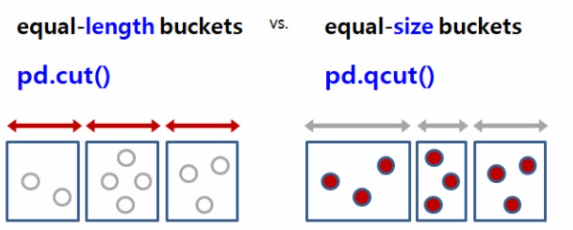

In [285]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/binning.PNG',width=500)
display(img)

In [ ]:
%pip install matplotlib

In [286]:
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

In [287]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
df_age
df_age.sort_values(by='Age')

Age
853  23.872422
998  24.225490
428  24.664915
256  24.761056
758  24.833494
..         ...
790  34.547351
172  34.620004
371  34.732947
636  35.383521
870  36.561290

[1000 rows x 1 columns]

> `cut` somehow corresponds to histograms...

Text(0, 0.5, 'Frequency')

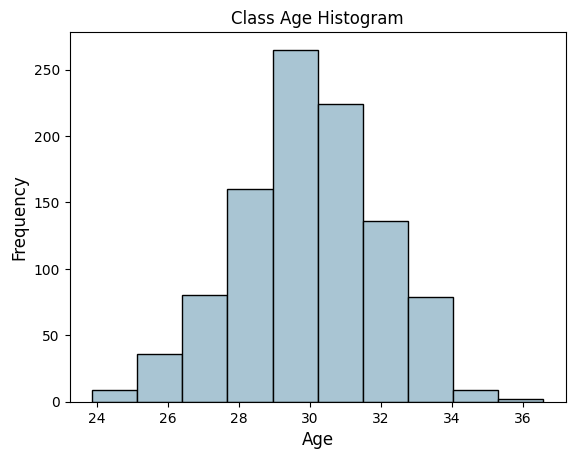

In [288]:
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [292]:
df_age

Age        bucket_cut       bucket_qcut
0    30.636700  (28.102, 32.332]  (29.221, 30.797]
1    33.260183  (32.332, 36.561]  (30.797, 36.561]
2    30.683914  (28.102, 32.332]  (29.221, 30.797]
3    28.935895  (28.102, 32.332]  (23.871, 29.221]
4    31.317700  (28.102, 32.332]  (30.797, 36.561]
..         ...               ...               ...
995  31.401419  (28.102, 32.332]  (30.797, 36.561]
996  31.199713  (28.102, 32.332]  (30.797, 36.561]
997  29.574827  (28.102, 32.332]  (29.221, 30.797]
998  24.225490   (23.86, 28.102]  (23.871, 29.221]
999  29.485596  (28.102, 32.332]  (29.221, 30.797]

[1000 rows x 3 columns]

In [293]:
pd.cut(df_age.Age, 3) 

0      (28.102, 32.332]
1      (32.332, 36.561]
2      (28.102, 32.332]
3      (28.102, 32.332]
4      (28.102, 32.332]
             ...       
995    (28.102, 32.332]
996    (28.102, 32.332]
997    (28.102, 32.332]
998     (23.86, 28.102]
999    (28.102, 32.332]
Name: Age, Length: 1000, dtype: category
Categories (3, interval[float64, right]): [(23.86, 28.102] < (28.102, 32.332] < (32.332, 36.561]]

In [290]:
print("cut")
df_age['bucket_cut'] = pd.cut(df_age.Age, 3) 
df_age['bucket_cut'].value_counts()
print(df_age['bucket_cut'].value_counts())# .plot(kind='bar')

print("\nqcut")
df_age['bucket_qcut'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_qcut'].value_counts())# .plot(kind='bar')

cut
(28.102, 32.332]    711
(23.86, 28.102]     163
(32.332, 36.561]    126
Name: bucket_cut, dtype: int64

qcut
(23.871, 29.221]    334
(29.221, 30.797]    333
(30.797, 36.561]    333
Name: bucket_qcut, dtype: int64


In [291]:
df_age

Age        bucket_cut       bucket_qcut
0    30.636700  (28.102, 32.332]  (29.221, 30.797]
1    33.260183  (32.332, 36.561]  (30.797, 36.561]
2    30.683914  (28.102, 32.332]  (29.221, 30.797]
3    28.935895  (28.102, 32.332]  (23.871, 29.221]
4    31.317700  (28.102, 32.332]  (30.797, 36.561]
..         ...               ...               ...
995  31.401419  (28.102, 32.332]  (30.797, 36.561]
996  31.199713  (28.102, 32.332]  (30.797, 36.561]
997  29.574827  (28.102, 32.332]  (29.221, 30.797]
998  24.225490   (23.86, 28.102]  (23.871, 29.221]
999  29.485596  (28.102, 32.332]  (29.221, 30.797]

[1000 rows x 3 columns]

In [ ]:
df_age

PhD Student    711
Student        163
Post-Doc       126
Name: bucket_q, dtype: int64


<Axes: >

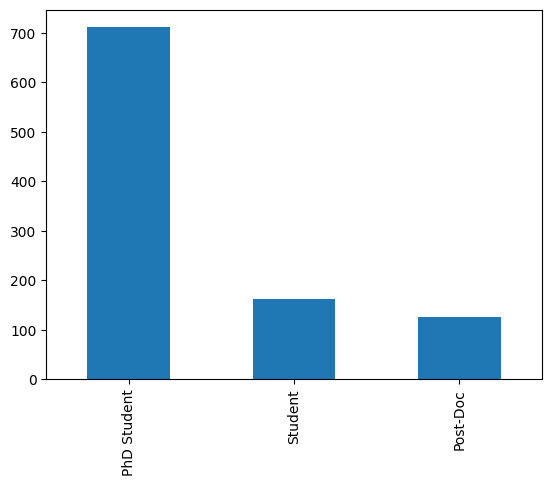

In [294]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')
df_age['bucket_q'].value_counts().plot(kind='bar')

In [295]:
df_age

Age        bucket_cut       bucket_qcut     bucket_q
0    30.636700  (28.102, 32.332]  (29.221, 30.797]  PhD Student
1    33.260183  (32.332, 36.561]  (30.797, 36.561]     Post-Doc
2    30.683914  (28.102, 32.332]  (29.221, 30.797]  PhD Student
3    28.935895  (28.102, 32.332]  (23.871, 29.221]  PhD Student
4    31.317700  (28.102, 32.332]  (30.797, 36.561]  PhD Student
..         ...               ...               ...          ...
995  31.401419  (28.102, 32.332]  (30.797, 36.561]  PhD Student
996  31.199713  (28.102, 32.332]  (30.797, 36.561]  PhD Student
997  29.574827  (28.102, 32.332]  (29.221, 30.797]  PhD Student
998  24.225490   (23.86, 28.102]  (23.871, 29.221]      Student
999  29.485596  (28.102, 32.332]  (29.221, 30.797]  PhD Student

[1000 rows x 4 columns]

In [296]:
df_age[['Age','bucket_q']].sort_values(by='Age')

Age  bucket_q
853  23.872422   Student
998  24.225490   Student
428  24.664915   Student
256  24.761056   Student
758  24.833494   Student
..         ...       ...
790  34.547351  Post-Doc
172  34.620004  Post-Doc
371  34.732947  Post-Doc
636  35.383521  Post-Doc
870  36.561290  Post-Doc

[1000 rows x 2 columns]

In [297]:
 pd.cut(df_age.Age, [10,20,30,40]).value_counts()

(20, 30]    504
(30, 40]    496
(10, 20]      0
Name: Age, dtype: int64

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

df1

In [ ]:
df2

In [ ]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

Note, you might need to sort the resulting dataframe

In [ ]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

In [ ]:
result.sort_index()

What if some rows have same index?
- You get more rows with same index! 

In [ ]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

In [ ]:
result.loc[4]

If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use `concat` only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

In [ ]:
result_reset=result.reset_index()
result_reset

You might also be interested in dropping duplicate rows (i.e., with same values apart from index)

In [ ]:
result_reset.drop_duplicates()

In [ ]:
result_reset

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [ ]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True,errors='ignore')
df2

In [ ]:
df1

In [ ]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

In [ ]:
right

We note that
- K0 and K2 appear in both dataframes
- K1 and K3 appear only in left

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
pd.merge(left, right,  how='outer', on='key')

In [ ]:
pd.merge(left, right,  how='left', on='key')

In [ ]:
pd.merge(left, right,  how='right', on='key')

- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

In [ ]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/join.jpeg',width=500)
display(img)

What if you want to ignore certain columns? 

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
right

In [ ]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Load/manipulate remote CSV file: Simple application to Italian COVID data

In [85]:
import numpy as np
import pandas as pd

Using Python and pandas, it is easy to read data from CSV files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [86]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')



In [87]:
type(covid_data)

pandas.core.frame.DataFrame

In [88]:
covid_data

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0     2020-02-24T18:00:00   ITA                     101                 26   
1     2020-02-25T18:00:00   ITA                     114                 35   
2     2020-02-26T18:00:00   ITA                     128                 36   
3     2020-02-27T18:00:00   ITA                     248                 56   
4     2020-02-28T18:00:00   ITA                     345                 64   
...                   ...   ...                     ...                ...   
1119  2023-03-19T17:00:00   ITA                    2624                104   
1120  2023-03-20T17:00:00   ITA                    2633                106   
1121  2023-03-21T17:00:00   ITA                    2609                107   
1122  2023-03-22T17:00:00   ITA                    2616                108   
1123  2023-03-23T17:00:00   ITA                    2584                105   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                      127                      94              221   
1                      150                     162              311   
2                      164                     221              385   
3                      304                     284              588   
4                      409                     412              821   
...                    ...                     ...              ...   
1119                  2728                  138918           141646   
1120                  2739                  137155           139894   
1121                  2716                  137356           140072   
1122                  2724                  136807           139531   
1123                  2689                  135910           138599   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
0                              0             221                1  ...   
1                             90              93                1  ...   
2                             74              78                3  ...   
3                            203             250               45  ...   
4                            233             238               46  ...   
...                          ...             ...              ...  ...   
1119                        -536            2163         25329198  ...   
1120                       -1752            1179         25332107  ...   
1121                         178            5187         25337065  ...   
1122                        -541            3865         25341435  ...   
1123                        -932            3582         25345910  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
0          4324           NaN   NaN                         NaN        NaN   
1          8623           NaN   NaN                         NaN        NaN   
2          9587           NaN   NaN                         NaN        NaN   
3         12014           NaN   NaN                         NaN        NaN   
4         15695           NaN   NaN                         NaN        NaN   
...         ...           ...   ...                         ...        ...   
1119  269302631    68135189.0   NaN                        10.0        NaN   
1120  269329460    68141477.0   NaN                        10.0        NaN   
1121  269423714    68158739.0   NaN                        13.0        NaN   
1122  269498920    68173291.0   NaN                        10.0        NaN   
1123  269569208    68187924.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
0           NaN                             NaN   
1           NaN                             NaN   
2           NaN                             NaN   
3           NaN                             NaN   
4           NaN                             NaN   
...         ...                             ...   
1119        NaN                       9751343.0 

In [89]:
covid_data.head(10)

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0  2020-02-24T18:00:00   ITA                     101                 26   
1  2020-02-25T18:00:00   ITA                     114                 35   
2  2020-02-26T18:00:00   ITA                     128                 36   
3  2020-02-27T18:00:00   ITA                     248                 56   
4  2020-02-28T18:00:00   ITA                     345                 64   
5  2020-02-29T18:00:00   ITA                     401                105   
6  2020-03-01T18:00:00   ITA                     639                140   
7  2020-03-02T18:00:00   ITA                     742                166   
8  2020-03-03T18:00:00   ITA                    1034                229   
9  2020-03-04T18:00:00   ITA                    1346                295   

   totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                   127                      94              221   
1                   150                     162              311   
2                   164                     221              385   
3                   304                     284              588   
4                   409                     412              821   
5                   506                     543             1049   
6                   779                     798             1577   
7                   908                     927             1835   
8                  1263                    1000             2263   
9                  1641                    1065             2706   

   variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  tamponi  \
0                           0             221                1  ...     4324   
1                          90              93                1  ...     8623   
2                          74              78                3  ...     9587   
3                         203             250               45  ...    12014   
4                         233             238               46  ...    15695   
5                         228             240               50  ...    18661   
6                         528             566               83  ...    21127   
7                         258             342              149  ...    23345   
8                         428             466              160  ...    25856   
9                         443             587              276  ...    29837   

   casi_testati  note  ingressi_terapia_intensiva  note_test  note_casi  \
0           NaN   NaN                         NaN        NaN        NaN   
1           NaN   NaN                         NaN        NaN        NaN   
2           NaN   NaN                         NaN        NaN        NaN   
3           NaN   NaN                         NaN        NaN        NaN   
4           NaN   NaN                         NaN        NaN        NaN   
5           NaN   NaN                         NaN        NaN        NaN   
6           NaN   NaN                         NaN        NaN        NaN   
7           NaN   NaN                         NaN        NaN        NaN   
8           NaN   NaN                         NaN        NaN        NaN   
9           NaN   NaN                         NaN        NaN        NaN   

  totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   
5                             NaN                                     NaN   
6                             NaN                                     NaN   
7                             NaN                                     NaN   
8                             NaN          

In [90]:
covid_data.tail()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
1119  2023-03-19T17:00:00   ITA                    2624                104   
1120  2023-03-20T17:00:00   ITA                    2633                106   
1121  2023-03-21T17:00:00   ITA                    2609                107   
1122  2023-03-22T17:00:00   ITA                    2616                108   
1123  2023-03-23T17:00:00   ITA                    2584                105   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1119                  2728                  138918           141646   
1120                  2739                  137155           139894   
1121                  2716                  137356           140072   
1122                  2724                  136807           139531   
1123                  2689                  135910           138599   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1119                        -536            2163         25329198  ...   
1120                       -1752            1179         25332107  ...   
1121                         178            5187         25337065  ...   
1122                        -541            3865         25341435  ...   
1123                        -932            3582         25345910  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1119  269302631    68135189.0   NaN                        10.0        NaN   
1120  269329460    68141477.0   NaN                        10.0        NaN   
1121  269423714    68158739.0   NaN                        13.0        NaN   
1122  269498920    68173291.0   NaN                        10.0        NaN   
1123  269569208    68187924.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1119        NaN                       9751343.0   
1120        NaN                       9751549.0   
1121        NaN                       9752715.0   
1122        NaN                       9753412.0   
1123        NaN                       9754070.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1119                              15908303.0              101041820.0   
1120                              15909275.0              101046716.0   
1121                              15913291.0              101064519.0   
1122                              15916453.0              101080395.0   
1123                              15919372.0              101095057.0   

      tamponi_test_antigenico_rapido  
1119                     168260811.0  
1120                     168282744.0  
1121                     168359195.0  
1122                     168418525.0  
1123                     168474151.0  

[5 rows x 24 columns]

In [91]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    1124 non-null   object 
 1   stato                                   1124 non-null   object 
 2   ricoverati_con_sintomi                  1124 non-null   int64  
 3   terapia_intensiva                       1124 non-null   int64  
 4   totale_ospedalizzati                    1124 non-null   int64  
 5   isolamento_domiciliare                  1124 non-null   int64  
 6   totale_positivi                         1124 non-null   int64  
 7   variazione_totale_positivi              1124 non-null   int64  
 8   nuovi_positivi                          1124 non-null   int64  
 9   dimessi_guariti                         1124 non-null   int64  
 10  deceduti                                1124 non-null   int6

In [92]:
covid_data.describe()

ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
count             1124.000000        1124.000000           1124.000000   
mean             10006.892349         972.008897          10978.902135   
std               8622.289718        1096.365870           9671.301347   
min                101.000000          26.000000            127.000000   
25%               3460.500000         227.000000           3741.000000   
50%               7030.000000         410.500000           7350.000000   
75%              15235.500000        1505.250000          16789.000000   
max              34697.000000        4068.000000          38507.000000   

       isolamento_domiciliare  totale_positivi  variazione_totale_positivi  \
count            1.124000e+03     1.124000e+03                 1124.000000   
mean             4.656333e+05     4.766122e+05                  123.112100   
std              5.123310e+05     5.154561e+05                20662.991378   
min              9.400000e+01     2.210000e+02              -116092.000000   
25%              8.109550e+04     9.235775e+04                -5187.250000   
50%              3.738995e+05     3.889650e+05                 -383.500000   
75%              5.968152e+05     6.094752e+05                 2594.250000   
max              2.713594e+06     2.734906e+06               172462.000000   

       nuovi_positivi  dimessi_guariti       deceduti  \
count     1124.000000     1.124000e+03    1124.000000   
mean     22572.442171     8.704553e+06  116205.319395   
std      32751.563344     8.998518e+06   57556.392061   
min         78.000000     1.000000e+00       7.000000   
25%       3069.500000     7.778230e+05   56164.750000   
50%      11238.000000     4.320106e+06  129672.500000   
75%      27310.500000     1.697528e+07  167569.000000   
max     220532.000000     2.534591e+07  188933.000000   

       casi_da_sospetto_diagnostico  ...   totale_casi       tamponi  \
count                    162.000000  ...  1.124000e+03  1.124000e+03   
mean                  345928.216049  ...  9.297371e+06  1.179056e+08   
std                   217856.889628  ...  9.208593e+06  9.851086e+07   
min                        0.000000  ...  2.290000e+02  4.324000e+03   
25%                   223237.500000  ...  1.616064e+06  2.208167e+07   
50%                   236256.500000  ...  4.582462e+06  8.612425e+07   
75%                   341673.000000  ...  1.774596e+07  2.235728e+08   
max                   988470.000000  ...  2.567344e+07  2.695692e+08   

       casi_testati  ingressi_terapia_intensiva  note_test  note_casi  \
count  1.069000e+03                  841.000000        0.0        0.0   
mean   3.653235e+07                   65.001189        NaN        NaN   
std    2.279331e+07                   65.273153        NaN        NaN   
min    9.353100e+05                    2.000000        NaN        NaN   
25%    1.546474e+07                   22.000000        NaN        NaN   
50%    3.451570e+07                   37.000000        NaN        NaN   
75%    5.963195e+07                   93.000000        NaN        NaN   
max    6.818792e+07                  324.000000        NaN        NaN   

       totale_positivi_test_molecolare  \
count                     7.980000e+02   
mean                      6.750692e+06   
std                       2.559396e+06   
min                       2.351466e+06   
25%                       4.202328e+06   
50%                       7.840605e+06   
75%                       9.260430e+06   
max                       9.754070e+06   

       totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
count                            7.980000e+02             7.980000e+02   
mean                             6.116130e+06             7.504109e+07   
std                              6.239505e+06             2.290604e+07   
min                              9.570000e+02             2.861735e+07   
25%                              1.574148e+05             5.463535e

In [93]:
covid_data['data']

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1119    2023-03-19T17:00:00
1120    2023-03-20T17:00:00
1121    2023-03-21T17:00:00
1122    2023-03-22T17:00:00
1123    2023-03-23T17:00:00
Name: data, Length: 1124, dtype: object

In [94]:
covid_data[ ['data','terapia_intensiva'] ]

data  terapia_intensiva
0     2020-02-24T18:00:00                 26
1     2020-02-25T18:00:00                 35
2     2020-02-26T18:00:00                 36
3     2020-02-27T18:00:00                 56
4     2020-02-28T18:00:00                 64
...                   ...                ...
1119  2023-03-19T17:00:00                104
1120  2023-03-20T17:00:00                106
1121  2023-03-21T17:00:00                107
1122  2023-03-22T17:00:00                108
1123  2023-03-23T17:00:00                105

[1124 rows x 2 columns]

In [96]:
covid_data.data

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1119    2023-03-19T17:00:00
1120    2023-03-20T17:00:00
1121    2023-03-21T17:00:00
1122    2023-03-22T17:00:00
1123    2023-03-23T17:00:00
Name: data, Length: 1124, dtype: object

In [97]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [98]:
covid_data.iloc[-1]

data                                      2023-03-23T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                   2584
terapia_intensiva                                         105
totale_ospedalizzati                                     2689
isolamento_domiciliare                                 135910
totale_positivi                                        138599
variazione_totale_positivi                               -932
nuovi_positivi                                           3582
dimessi_guariti                                      25345910
deceduti                                               188933
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                          25673442
tamponi                                             269569208
casi_testati                                       68187924.0
note    

In [99]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
print(type(last_day))
print(last_day)

<class 'str'>
2023-03-23T17:00:00


Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [102]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_last_day

0       False
1       False
2       False
3       False
4       False
        ...  
1119    False
1120    False
1121    False
1122    False
1123     True
Name: data, Length: 1124, dtype: bool


data stato  ricoverati_con_sintomi  terapia_intensiva  \
1123  2023-03-23T17:00:00   ITA                    2584                105   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1123                  2689                  135910           138599   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1123                        -932            3582         25345910  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1123  269569208    68187924.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1123        NaN                       9754070.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1123                              15919372.0              101095057.0   

      tamponi_test_antigenico_rapido  
1123                     168474151.0  

[1 rows x 24 columns]

In [103]:
cov_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [ ]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [104]:

covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')


In [105]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

In [255]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 32 to 416
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    101 non-null    object 
 1   stato                                   101 non-null    object 
 2   ricoverati_con_sintomi                  101 non-null    int64  
 3   terapia_intensiva                       101 non-null    int64  
 4   totale_ospedalizzati                    101 non-null    int64  
 5   isolamento_domiciliare                  101 non-null    int64  
 6   totale_positivi                         101 non-null    int64  
 7   variazione_totale_positivi              101 non-null    int64  
 8   nuovi_positivi                          101 non-null    int64  
 9   dimessi_guariti                         101 non-null    int64  
 10  deceduti                                101 non-null    int64

In [262]:
covid_data[['terapia_intensiva','ricoverati_con_sintomi']].idxmax()

terapia_intensiva          39
ricoverati_con_sintomi    273
dtype: int64

In [264]:
#covid_data.iloc[39]
covid_data.iloc[273]

data                                      2020-11-23T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                  34697
terapia_intensiva                                        3810
totale_ospedalizzati                                    38507
isolamento_domiciliare                                 758342
totale_positivi                                        796849
variazione_totale_positivi                              -9098
nuovi_positivi                                          22930
dimessi_guariti                                        584493
deceduti                                                50453
casi_da_sospetto_diagnostico                         870461.0
casi_da_screening                                    561334.0
totale_casi                                           1431795
tamponi                                              20537521
casi_testati                                       12303705.0
note    

# Plot dataframes: Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

## Import libraries

In [298]:
# install Yahoo! Finance market data downloader for Pandas
#convenient package for accessing online data (mostly finance-related)
%pip install -U pandas_datareader
# # %pip install matplotlib #'the' pyhton package for creating plots 
# Helps formatting strings with HTML and CSS.
%pip install -U Jinja2 
%pip install yfinance

import pandas_datareader.data as web

#A workaround to fix recent issues in the service (problems since december 2022)
import yfinance as yfin
yfin.pdr_override()

# Visualizzation libs
#keeps the plots in one place. calls image as static pngs
#%matplotlib inline 
#MATLAB-like plotting framework.
import matplotlib.pyplot as plt


import pandas as pd

You should consider upgrading via the '/Users/andrea/Library/CloudStorage/OneDrive-ScuolaSuperioreSant'Anna/SSSA_OneDrive/Teaching/20222023/Polimi/env_python_polimi_2023/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/andrea/Library/CloudStorage/OneDrive-ScuolaSuperioreSant'Anna/SSSA_OneDrive/Teaching/20222023/Polimi/env_python_polimi_2023/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/andrea/Library/CloudStorage/OneDrive-ScuolaSuperioreSant'Anna/SSSA_OneDrive/Teaching/20222023/Polimi/env_python_polimi_2023/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Donwload data

Do you know dictionary comprehensions?

In [299]:
#https://finance.yahoo.com/quote/AAPL/history?period1=1467770400&period2=1625536799&interval=1d&frequency=1d&filter=history&guccounter=1&guce_referrer=aHR0cDovL2xvY2FsaG9zdDo4ODg4Lw&guce_referrer_sig=AQAAAByrNT-HvDMWtenDoAglNPRKNaphvEwT3rMevHGT-mKwGMlw5NvAj3GlaBn1ztprmTfT4vIDwdzHgXvFpe72e3ISW5I0FoYRmSqR1SzvVcwg8VmpqbFpYQn8lMZqSHSkhru9c3-fOHLDo5dWLBUiR9iqs0kLoNADVPIfhXtw72_x
all_data = {ticker: web.get_data_yahoo(ticker,"2004-08-19","2023-03-01")
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    0.562679    0.568929    0.542143    0.548393    0.466747   
2004-08-20    0.548393    0.553393    0.544464    0.550000    0.468115   
2004-08-23    0.551071    0.558393    0.546429    0.555000    0.472371   
2004-08-24    0.558214    0.570536    0.556964    0.570536    0.485594   
2004-08-25    0.569107    0.591964    0.566607    0.590179    0.502312   
...                ...         ...         ...         ...         ...   
2023-02-22  148.869995  149.949997  147.160004  148.910004  148.910004   
2023-02-23  150.089996  150.339996  147.240005  149.399994  149.399994   
2023-02-24  147.110001  147.190002  145.720001  146.710007  146.710007   
2023-02-27  147.710007  149.169998  147.449997  147.919998  147.919998   
2023-02-28  147.050003  149.080002  146.830002  147.410004  147.410004   

               Volume  
Date                   
2004-08-19  388920000  
2004-08-20  316780800  
2004-08-23  254660000  
2004-08-24  374136000  
2004-08-25  505618400  
...               ...  
2023-02-22   51011300  
2023-02-23   48394200  
2023-02-24   55469600  
2023-02-27   44998500  
2023-02-28   50547000  

[4664 rows x 6 columns]

In [ ]:
all_data['AAPL']

In [300]:
all_data['IBM']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19   81.022942   81.596558   80.736137   81.156792   47.729893   
2004-08-20   80.803062   81.500954   80.803062   81.500954   47.932297   
2004-08-23   81.481834   81.692162   80.927345   80.927345   47.594952   
2004-08-24   81.261948   81.405357   80.640533   80.984703   47.628693   
2004-08-25   81.261948   81.520073   80.831741   81.328873   47.831104   
...                ...         ...         ...         ...         ...   
2023-02-22  131.899994  131.990005  130.289993  130.970001  130.970001   
2023-02-23  131.500000  131.699997  128.860001  130.789993  130.789993   
2023-02-24  129.619995  130.669998  129.220001  130.570007  130.570007   
2023-02-27  131.419998  131.869995  130.130005  130.490005  130.490005   
2023-02-28  130.550003  130.610001  129.139999  129.300003  129.300003   

             Volume  
Date                 
2004-08-19  4920907  
2004-08-20  4708464  
2004-08-23  4456588  
2004-08-24  2835078  
2004-08-25  4608258  
...             ...  
2023-02-22  3200200  
2023-02-23  3725600  
2023-02-24  3015800  
2023-02-27  2761300  
2023-02-28  5143100  

[4664 rows x 6 columns]

## Extract and combine data of interest

In [301]:
dictionary = {ticker: data['Adj Close'] for ticker, data in all_data.items()}
dictionary

{'AAPL': Date
 2004-08-19      0.466747
 2004-08-20      0.468115
 2004-08-23      0.472371
 2004-08-24      0.485594
 2004-08-25      0.502312
                  ...    
 2023-02-22    148.910004
 2023-02-23    149.399994
 2023-02-24    146.710007
 2023-02-27    147.919998
 2023-02-28    147.410004
 Name: Adj Close, Length: 4664, dtype: float64,
 'IBM': Date
 2004-08-19     47.729893
 2004-08-20     47.932297
 2004-08-23     47.594952
 2004-08-24     47.628693
 2004-08-25     47.831104
                  ...    
 2023-02-22    130.970001
 2023-02-23    130.789993
 2023-02-24    130.570007
 2023-02-27    130.490005
 2023-02-28    129.300003
 Name: Adj Close, Length: 4664, dtype: float64,
 'MSFT': Date
 2004-08-19     17.069752
 2004-08-20     17.120106
 2004-08-23     17.195860
 2004-08-24     17.195860
 2004-08-25     17.391550
                  ...    
 2023-02-22    251.509995
 2023-02-23    254.770004
 2023-02-24    249.220001
 2023-02-27    250.160004
 2023-02-28    249.419998
 Name

Let us collect only the [_adjusted stock price_](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for each company

In [302]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

AAPL        IBM       MSFT      GOOG
Date                                                
2004-08-19  0.466747  47.729893  17.069752  2.499133
2004-08-20  0.468115  47.932297  17.120106  2.697639
2004-08-23  0.472371  47.594952  17.195860  2.724787
2004-08-24  0.485594  47.628693  17.195860  2.611960
2004-08-25  0.502312  47.831104  17.391550  2.640104

In [303]:
price.tail()

AAPL         IBM        MSFT       GOOG
Date                                                     
2023-02-22  148.910004  130.970001  251.509995  91.800003
2023-02-23  149.399994  130.789993  254.770004  91.070000
2023-02-24  146.710007  130.570007  249.220001  89.349998
2023-02-27  147.919998  130.490005  250.160004  90.099998
2023-02-28  147.410004  129.300003  249.419998  90.300003

In [314]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4664 entries, 2004-08-19 to 2023-02-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4664 non-null   float64
 1   IBM     4664 non-null   float64
 2   MSFT    4664 non-null   float64
 3   GOOG    4664 non-null   float64
dtypes: float64(4)
memory usage: 182.2 KB


In [316]:
price.to_csv('yahoo_prices.csv')

## Compute, plot, and smooth returns

Now, creating a simple plot of the dataframe takes only 1 line

<Axes: xlabel='Date'>

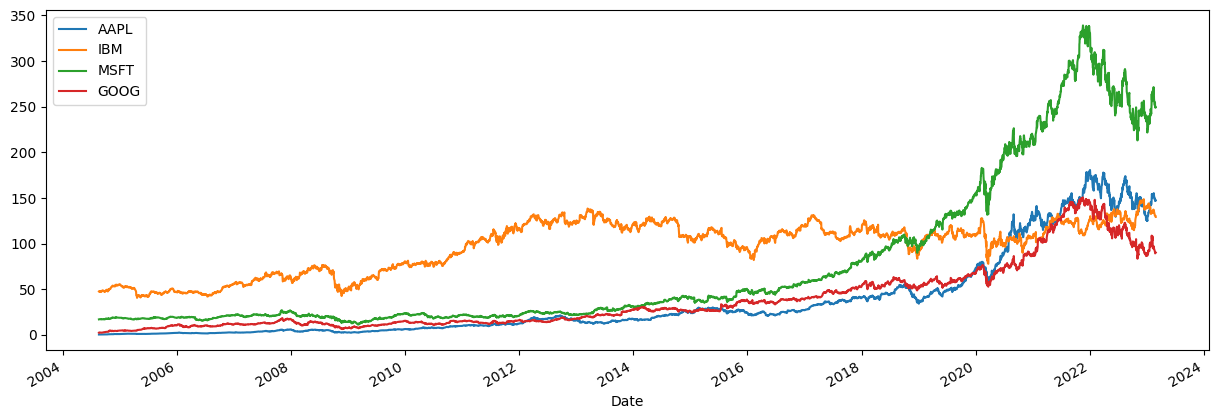

In [305]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [306]:
returns = price.pct_change() 
returns.head()

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-19       NaN       NaN       NaN       NaN
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775

In [307]:
returns.dropna(inplace=True)
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2023-02-22  0.002896 -0.005618 -0.004591 -0.002716
2023-02-23  0.003291 -0.001374  0.012962 -0.007952
2023-02-24 -0.018005 -0.001682 -0.021784 -0.018887
2023-02-27  0.008248 -0.000613  0.003772  0.008394
2023-02-28 -0.003448 -0.009119 -0.002958  0.002220

[4663 rows x 4 columns]

<Axes: xlabel='Date'>

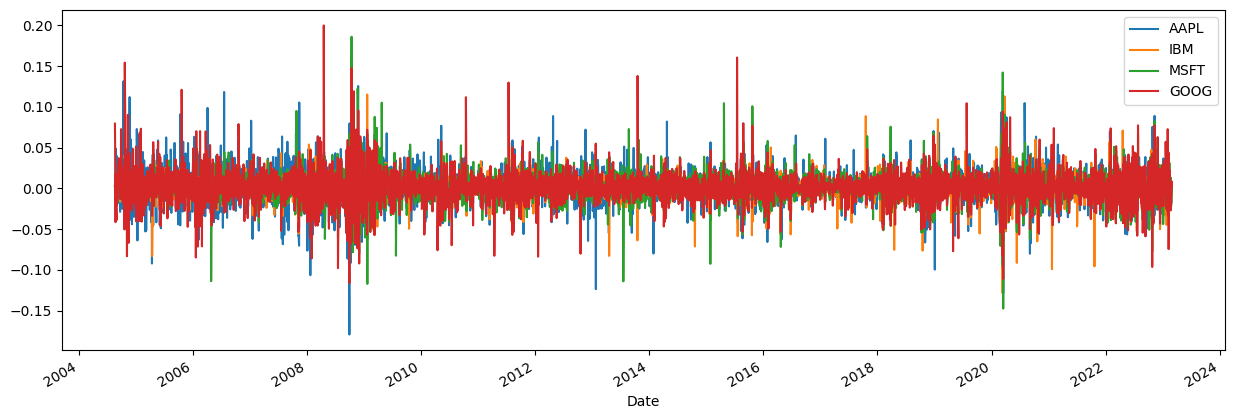

In [308]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [309]:
returns_smooth=returns.rolling(15).mean()
returns_smooth
#returns_smooth.head(16)

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20       NaN       NaN       NaN       NaN
2004-08-23       NaN       NaN       NaN       NaN
2004-08-24       NaN       NaN       NaN       NaN
2004-08-25       NaN       NaN       NaN       NaN
2004-08-26       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2023-02-22  0.002353 -0.001027  0.001403 -0.005012
2023-02-23  0.002046 -0.001297  0.000939 -0.006584
2023-02-24 -0.001625 -0.002051 -0.003639 -0.012687
2023-02-27 -0.002702 -0.002360 -0.001813 -0.009934
2023-02-28 -0.001737 -0.002598 -0.001603 -0.008677

[4663 rows x 4 columns]

In this case
- It makes sense to drop the NA rows...

In [310]:
returns_smooth.dropna(inplace=True)
returns_smooth

AAPL       IBM      MSFT      GOOG
Date                                              
2004-09-10  0.010591  0.001467  0.001126  0.003639
2004-09-13  0.009876  0.000977  0.000347 -0.000283
2004-09-14  0.009082  0.001623  0.000517  0.001520
2004-09-15  0.006671  0.001307 -0.000090  0.004586
2004-09-16  0.006554  0.000831 -0.000677  0.005040
...              ...       ...       ...       ...
2023-02-22  0.002353 -0.001027  0.001403 -0.005012
2023-02-23  0.002046 -0.001297  0.000939 -0.006584
2023-02-24 -0.001625 -0.002051 -0.003639 -0.012687
2023-02-27 -0.002702 -0.002360 -0.001813 -0.009934
2023-02-28 -0.001737 -0.002598 -0.001603 -0.008677

[4649 rows x 4 columns]

<Axes: xlabel='Date'>

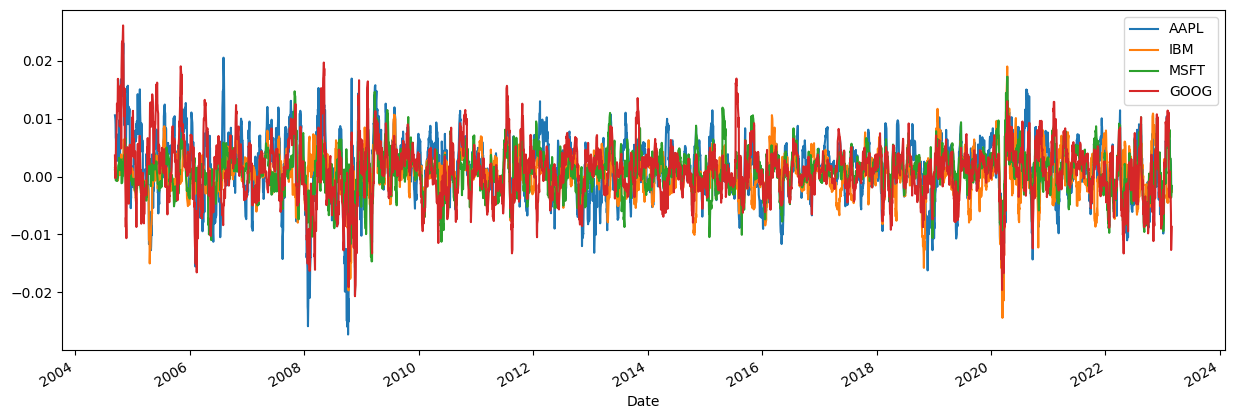

In [313]:
returns_smooth.plot(figsize=(15,5))

## What about risk?

__Please, forgive my ignorance :D__

For each company, we can calculate:
- the mean of the returns
- the standard deviation of the returns

These statistics are very important for investors:
- Mean returns give us an understanding of the profitability of an investment
- The standard deviation measures how much the returns fluctuate. We call this __risk__. 

Typically __higher risks are associated with higher returns__. 
- Which company has highest returns?
- Which company has highest risk?

In [318]:
print("The maximum mean is in:",returns.mean().idxmax() )
print("The maximum standard deviation is in:",returns.std().idxmax())

The maximum mean is in: AAPL
The maximum standard deviation is in: AAPL


In [320]:
returns.mean()

AAPL    0.001455
IBM     0.000318
MSFT    0.000724
GOOG    0.000957
dtype: float64

In [321]:
returns.std()

AAPL    0.020967
IBM     0.014432
MSFT    0.017268
GOOG    0.019448
dtype: float64

In [322]:
returns.describe()

AAPL          IBM         MSFT         GOOG
count  4663.000000  4663.000000  4663.000000  4663.000000
mean      0.001455     0.000318     0.000724     0.000957
std       0.020967     0.014432     0.017268     0.019448
min      -0.179195    -0.128507    -0.147390    -0.116091
25%      -0.008512    -0.006320    -0.007166    -0.007771
50%       0.001118     0.000416     0.000390     0.000691
75%       0.012056     0.007349     0.008747     0.010042
max       0.139049     0.115150     0.186047     0.199915

In [323]:
returns.describe().loc['mean':'std']

AAPL       IBM      MSFT      GOOG
mean  0.001455  0.000318  0.000724  0.000957
std   0.020967  0.014432  0.017268  0.019448

## Compute correlations

DataFrames offer two methods for computing 
* the __correlation__ among the elements in the DataFrame (`corr`)
* the __covariance__ matrix of the DataFrame (`cov`)

In [324]:
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2023-02-22  0.002896 -0.005618 -0.004591 -0.002716
2023-02-23  0.003291 -0.001374  0.012962 -0.007952
2023-02-24 -0.018005 -0.001682 -0.021784 -0.018887
2023-02-27  0.008248 -0.000613  0.003772  0.008394
2023-02-28 -0.003448 -0.009119 -0.002958  0.002220

[4663 rows x 4 columns]

In [325]:
returns.corr()

AAPL       IBM      MSFT      GOOG
AAPL  1.000000  0.434406  0.524192  0.520685
IBM   0.434406  1.000000  0.505935  0.404587
MSFT  0.524192  0.505935  1.000000  0.566197
GOOG  0.520685  0.404587  0.566197  1.000000

In [326]:
returns.corr().style.background_gradient(cmap='Reds')

In [327]:
returns.cov()

AAPL       IBM      MSFT      GOOG
AAPL  0.000440  0.000131  0.000190  0.000212
IBM   0.000131  0.000208  0.000126  0.000114
MSFT  0.000190  0.000126  0.000298  0.000190
GOOG  0.000212  0.000114  0.000190  0.000378

In [328]:
returns.cov().style.background_gradient(cmap='Reds')

## Interested in playing more with this case study?

https://towardsdatascience.com/analyzing-financial-data-in-python-ccf5c99f55e8?gi=7a3fb215ea05

> A few things changes in the library after the post has been written
> - Adapt our code to download new financial data
> - The webpage contains material on __risk analysis!__

# More on plotting: More complex application to Italian COVID data
Pandas offers a number of plotting methods for DataFrame objects

In [ ]:
%pip install matplotlib

#import sys
#!"{sys.executable}" -m pip install matplotlib

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [329]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [330]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2023-03-19T17:00:00   ITA                    2624                104   
2023-03-20T17:00:00   ITA                    2633                106   
2023-03-21T17:00:00   ITA                    2609                107   
2023-03-22T17:00:00   ITA                    2616                108   
2023-03-23T17:00:00   ITA                    2584                105   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2023-03-19T17:00:00                  2728                  138918   
2023-03-20T17:00:00                  2739                  137155   
2023-03-21T17:00:00                  2716                  137356   
2023-03-22T17:00:00                  2724                  136807   
2023-03-23T17:00:00                  2689                  135910   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2023-03-19T17:00:00           141646                        -536   
2023-03-20T17:00:00           139894                       -1752   
2023-03-21T17:00:00           140072                         178   
2023-03-22T17:00:00           139531                        -541   
2023-03-23T17:00:00           138599                        -932   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2023-03-19T17:00:00            2163         25329198    188802  ...   
2023-03-20T17:00:00            1179         25332107    188823  ...   
2023-03-21T17:00:00            5187         25337065    188869  ...   
2023-03-22T17:00:00            3865         25341435    188899  ...   
2023-03-23T17:00:00            3582         25345910    188933  ...   

                       tamponi  casi_testati  note  \
data                                                 
2023-03-19T17:00:00  269302631    68135189.0   NaN   
2023-03-20T17:00:00  269329460    68141477.0   NaN   
2023-03-21T17:00:00  269423714    68158739.0   NaN   
2023-03-22T17:00:00  269498920    68173291.0   NaN   
2023-03-23T17:00:00  269569208    68187924.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2023-03-19T17:00:00                        10.0        NaN       NaN   
2023-03-20T17:00:00                        10.0        NaN       NaN   
2023-03-21T17:00:00                        13.0        NaN       NaN   
2023-03-22T17:00:00                        10.0        NaN       NaN   
2023-03-23T17:00:00                         6.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2023-03-19T17:00:00                        9751343.0   
2023-03-20T17:00:00                        9751549.0   
2023-03-21T17:00:00                        9752715.0   
2023-03-22T17:00:00                        9753412.0   
2023-03-23T17:00:00                        9754070.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2023-03-19T17:00:00                              15908303.0   
2023-03-20T17:00:00                              15909275.0   
2023-03-21T17:00:00                              15913291.0   
2023-03-22T17:00:00                              15916453.0   
2023-03-23T17:00:00                              15919372.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2023-03-19T17:00:00              101041820.0                     168260811.0  
2023-03-20T17:00:00              101046716.0                     168282744.0  
2023-03-21T17:00:00  

Pandas considers the date as a string
- Let's tell to pands that it is a date
- This will allow us to reason in terms of time

In [331]:
covid_italy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1124 entries, 2020-02-24T18:00:00 to 2023-03-23T17:00:00
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   stato                                   1124 non-null   object 
 1   ricoverati_con_sintomi                  1124 non-null   int64  
 2   terapia_intensiva                       1124 non-null   int64  
 3   totale_ospedalizzati                    1124 non-null   int64  
 4   isolamento_domiciliare                  1124 non-null   int64  
 5   totale_positivi                         1124 non-null   int64  
 6   variazione_totale_positivi              1124 non-null   int64  
 7   nuovi_positivi                          1124 non-null   int64  
 8   dimessi_guariti                         1124 non-null   int64  
 9   deceduti                                1124 non-null   int64  
 10  casi_da_sospetto_diagnostico    

In [332]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2023-03-14T17:00:00', '2023-03-15T17:00:00', '2023-03-16T17:00:00',
       '2023-03-17T17:00:00', '2023-03-18T17:00:00', '2023-03-19T17:00:00',
       '2023-03-20T17:00:00', '2023-03-21T17:00:00', '2023-03-22T17:00:00',
       '2023-03-23T17:00:00'],
      dtype='object', name='data', length=1124)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2023-03-14 17:00:00', '2023-03-15 17:00:00',
               '2023-03-16 17:00:00', 

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [335]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti','terapia_intensiva' ]]
covid_italy_filter

totale_positivi  dimessi_guariti  deceduti  \
data                                                              
2020-02-24 18:00:00              221                1         7   
2020-02-25 18:00:00              311                1        10   
2020-02-26 18:00:00              385                3        12   
2020-02-27 18:00:00              588               45        17   
2020-02-28 18:00:00              821               46        21   
...                              ...              ...       ...   
2023-03-19 17:00:00           141646         25329198    188802   
2023-03-20 17:00:00           139894         25332107    188823   
2023-03-21 17:00:00           140072         25337065    188869   
2023-03-22 17:00:00           139531         25341435    188899   
2023-03-23 17:00:00           138599         25345910    188933   

                     terapia_intensiva  
data                                    
2020-02-24 18:00:00                 26  
2020-02-25 18:00:00                 35  
2020-02-26 18:00:00                 36  
2020-02-27 18:00:00                 56  
2020-02-28 18:00:00                 64  
...                                ...  
2023-03-19 17:00:00                104  
2023-03-20 17:00:00                106  
2023-03-21 17:00:00                107  
2023-03-22 17:00:00                108  
2023-03-23 17:00:00                105  

[1124 rows x 4 columns]

During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

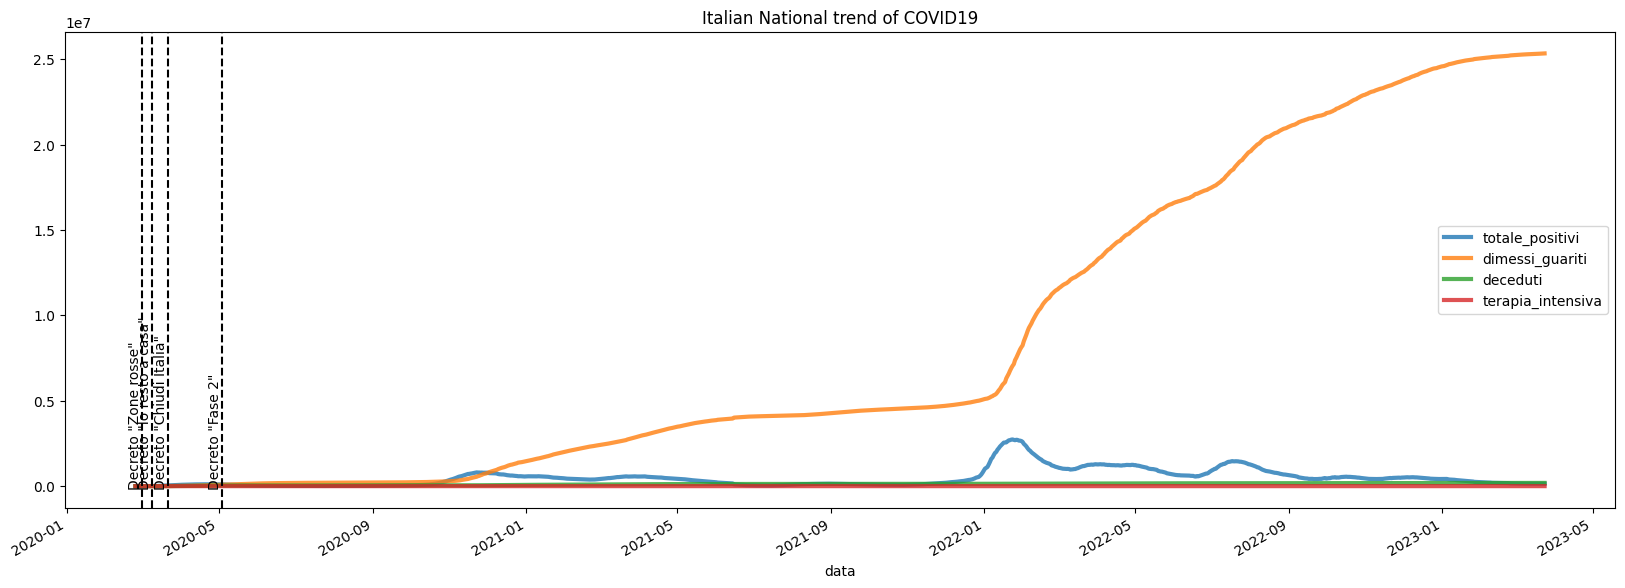

In [336]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [337]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

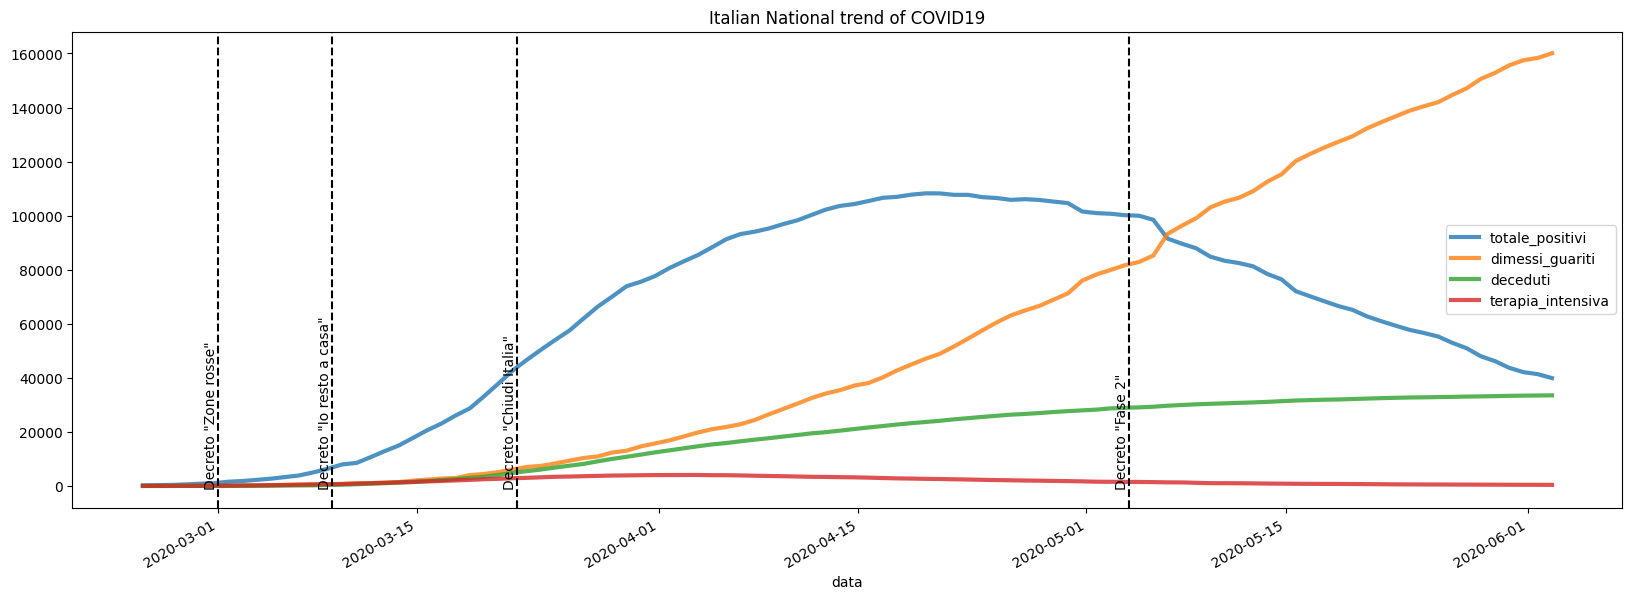

In [341]:
#Symbol \ allows to split a line in two
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, \
                                   title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

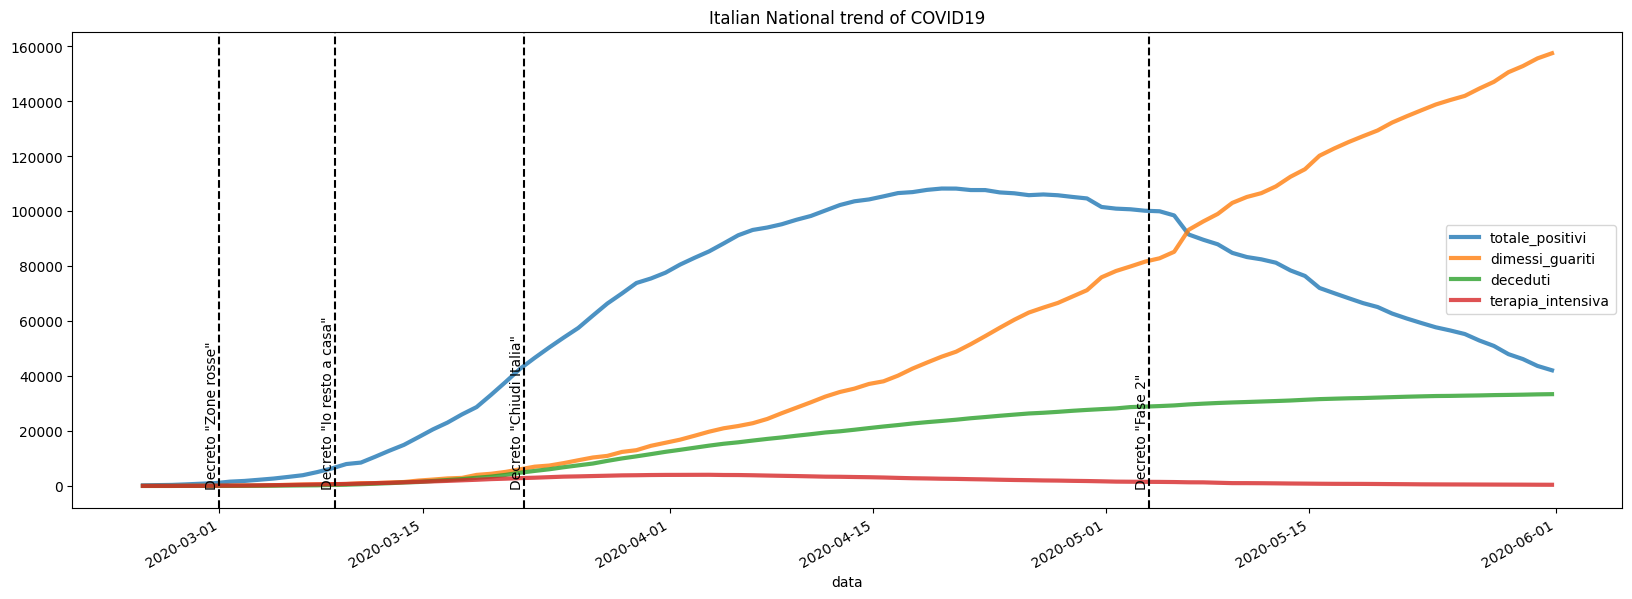

In [342]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), \
    linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

In [ ]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

What about recent months?

<Axes: title={'center': 'Since end of 2021'}, xlabel='data'>

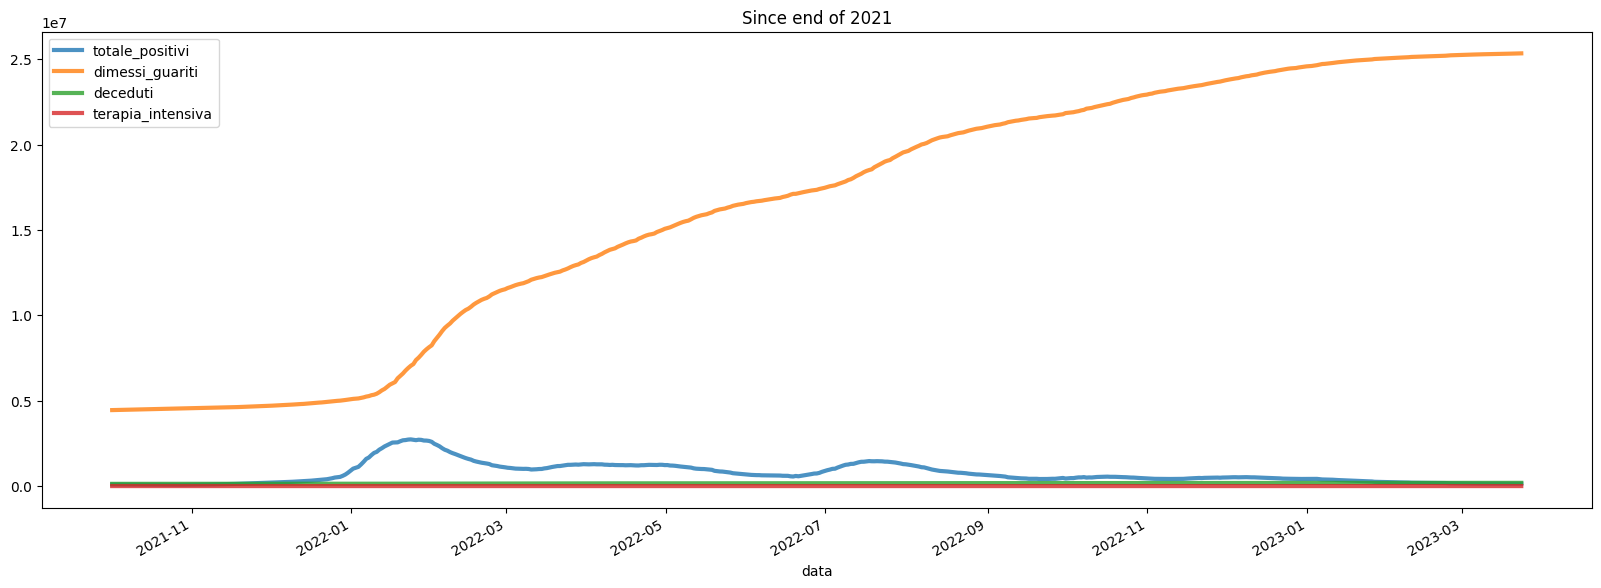

In [343]:
covid_italy_filter.loc[covid_italy_filter.index>= datetime(2021, 10, 1)].plot(figsize=(20, 7), \
                                                        linewidth=3, alpha=0.8, title="Since end of 2021") 



## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

In [344]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

covid_regions

data stato  codice_regione  \
data                                                             
2020-02-24 18:00:00  2020-02-24T18:00:00   ITA              13   
2020-02-24 18:00:00  2020-02-24T18:00:00   ITA              17   
2020-02-24 18:00:00  2020-02-24T18:00:00   ITA              18   
2020-02-24 18:00:00  2020-02-24T18:00:00   ITA              15   
2020-02-24 18:00:00  2020-02-24T18:00:00   ITA               8   
...                                  ...   ...             ...   
2023-03-23 17:00:00  2023-03-23T17:00:00   ITA              19   
2023-03-23 17:00:00  2023-03-23T17:00:00   ITA               9   
2023-03-23 17:00:00  2023-03-23T17:00:00   ITA              10   
2023-03-23 17:00:00  2023-03-23T17:00:00   ITA               2   
2023-03-23 17:00:00  2023-03-23T17:00:00   ITA               5   

                            regione        lat       long  \
data                                                        
2020-02-24 18:00:00         Abruzzo  42.351222  13.398438   
2020-02-24 18:00:00      Basilicata  40.639471  15.805148   
2020-02-24 18:00:00        Calabria  38.905976  16.594402   
2020-02-24 18:00:00        Campania  40.839566  14.250850   
2020-02-24 18:00:00  Emilia-Romagna  44.494367  11.341721   
...                             ...        ...        ...   
2023-03-23 17:00:00         Sicilia  38.115697  13.362357   
2023-03-23 17:00:00         Toscana  43.769231  11.255889   
2023-03-23 17:00:00          Umbria  43.106758  12.388247   
2023-03-23 17:00:00   Valle d'Aosta  45.737503   7.320149   
2023-03-23 17:00:00          Veneto  45.434905  12.338452   

                     ricoverati_con_sintomi  terapia_intensiva  \
data                                                             
2020-02-24 18:00:00                       0                  0   
2020-02-24 18:00:00                       0                  0   
2020-02-24 18:00:00                       0                  0   
2020-02-24 18:00:00                       0                  0   
2020-02-24 18:00:00                      10                  2   
...                                     ...                ...   
2023-03-23 17:00:00                     169                 14   
2023-03-23 17:00:00                     130                  4   
2023-03-23 17:00:00                      71                  0   
2023-03-23 17:00:00                       6                  0   
2023-03-23 17:00:00                     260                  9   

                     totale_ospedalizzati  isolamento_domiciliare  ...  \
data                                                               ...   
2020-02-24 18:00:00                     0                       0  ...   
2020-02-24 18:00:00                     0                       0  ...   
2020-02-24 18:00:00                     0                       0  ...   
2020-02-24 18:00:00                     0                       0  ...   
2020-02-24 18:00:00                    12                       6  ...   
...                                   ...                     ...  ...   
2023-03-23 17:00:00                   183                    6916  ...   
2023-03-23 17:00:00                   134                    7078  ...   
2023-03-23 17:00:00                    71                     801  ...   
2023-03-23 17:00:00                     6                     261  ...   
2023-03-23 17:00:00                   269                   17534  ...   

                                                                  note  \
data                                                                     
2020-02-24 18:00:00                                                NaN   
2020-02-24 18:00:00                                                NaN   
2020-02-24 18:00:00                                                NaN   
2020-02-24 18:00:00                                                NaN   
2020-02-24 18:00:00                                                NaN   
...                                        

In [346]:
# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

cov_regions_last_day

data stato  codice_regione  \
regione                                                            
Abruzzo                2023-03-23T17:00:00   ITA              13   
Basilicata             2023-03-23T17:00:00   ITA              17   
Calabria               2023-03-23T17:00:00   ITA              18   
Campania               2023-03-23T17:00:00   ITA              15   
Emilia-Romagna         2023-03-23T17:00:00   ITA               8   
Friuli Venezia Giulia  2023-03-23T17:00:00   ITA               6   
Lazio                  2023-03-23T17:00:00   ITA              12   
Liguria                2023-03-23T17:00:00   ITA               7   
Lombardia              2023-03-23T17:00:00   ITA               3   
Marche                 2023-03-23T17:00:00   ITA              11   
Molise                 2023-03-23T17:00:00   ITA              14   
P.A. Bolzano           2023-03-23T17:00:00   ITA              21   
P.A. Trento            2023-03-23T17:00:00   ITA              22   
Piemonte               2023-03-23T17:00:00   ITA               1   
Puglia                 2023-03-23T17:00:00   ITA              16   
Sardegna               2023-03-23T17:00:00   ITA              20   
Sicilia                2023-03-23T17:00:00   ITA              19   
Toscana                2023-03-23T17:00:00   ITA               9   
Umbria                 2023-03-23T17:00:00   ITA              10   
Valle d'Aosta          2023-03-23T17:00:00   ITA               2   
Veneto                 2023-03-23T17:00:00   ITA               5   

                                     regione        lat       long  \
regione                                                              
Abruzzo                              Abruzzo  42.351222  13.398438   
Basilicata                        Basilicata  40.639471  15.805148   
Calabria                            Calabria  38.905976  16.594402   
Campania                            Campania  40.839566  14.250850   
Emilia-Romagna                Emilia-Romagna  44.494367  11.341721   
Friuli Venezia Giulia  Friuli Venezia Giulia  45.649435  13.768136   
Lazio                                  Lazio  41.892770  12.483667   
Liguria                              Liguria  44.411493   8.932699   
Lombardia                          Lombardia  45.466794   9.190347   
Marche                                Marche  43.616760  13.518875   
Molise                                Molise  41.557748  14.659161   
P.A. Bolzano                    P.A. Bolzano  46.499335  11.356624   
P.A. Trento                      P.A. Trento  46.068935  11.121231   
Piemonte                            Piemonte  45.073274   7.680687   
Puglia                                Puglia  41.125596  16.867367   
Sardegna                            Sardegna  39.215312   9.110616   
Sicilia                              Sicilia  38.115697  13.362357   
Toscana                              Toscana  43.769231  11.255889   
Umbria                                Umbria  43.106758  12.388247   
Valle d'Aosta                  Valle d'Aosta  45.737503   7.320149   
Veneto                                Veneto  45.434905  12.338452   

                       ricoverati_con_sintomi  terapia_intensiva  \
regione                                                            
Abruzzo                                    57                  1   
Basilicata                                 14                  0   
Calabria                                   72                  3   
Campania                                  172                  8   
Emilia-Romagna                            432                 23   
Friuli Venezia Giulia                      77                  2   
Lazio                                     393                 14   
Liguria                                    84                  3   
Lombardia                                 213                  1   
Marche                                     19                  0   
Molise                                      3 

<Axes: title={'center': ' Deceduti vs Positivi updated at 03/23/23'}, xlabel='regione'>

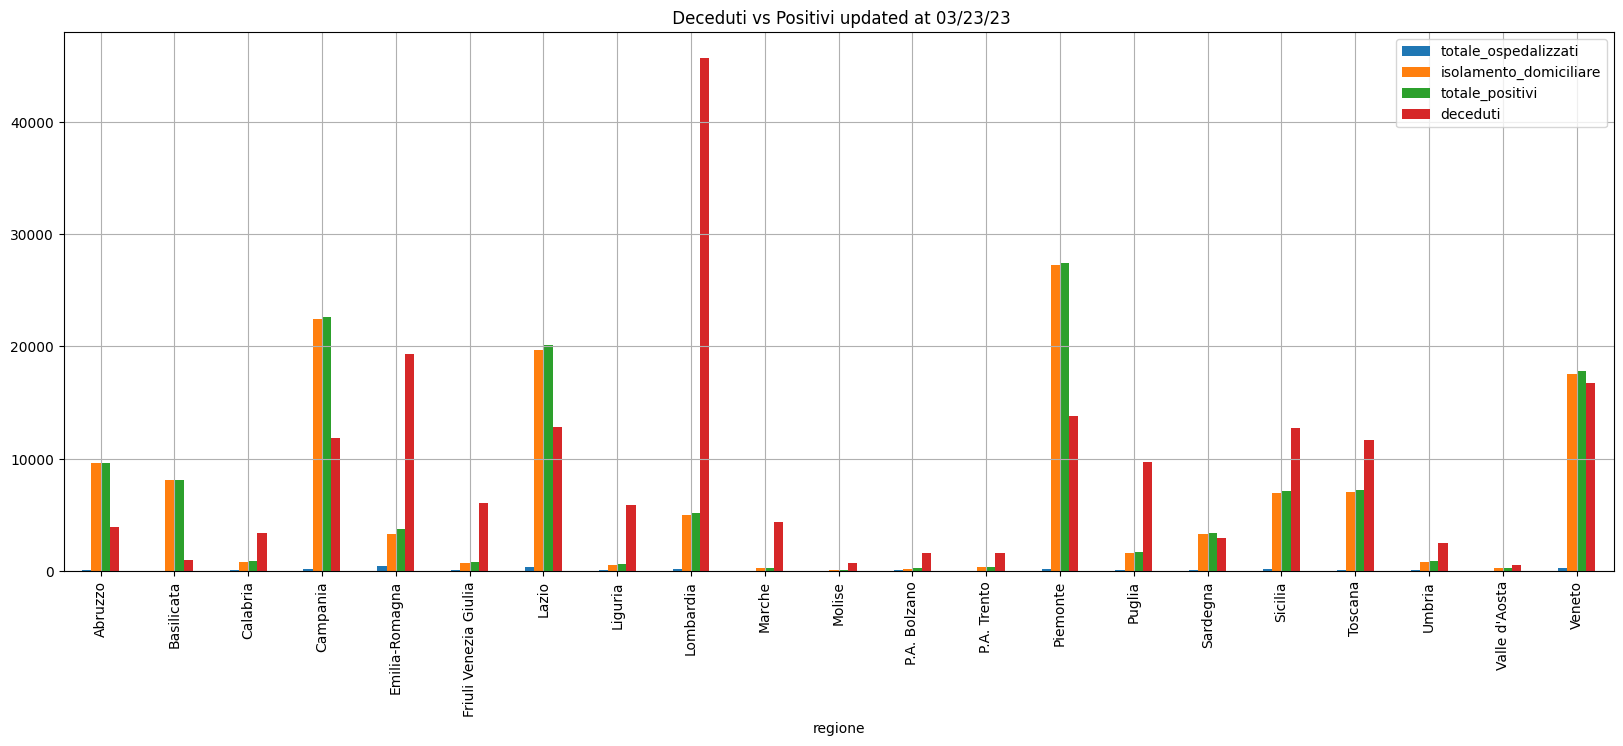

In [347]:
#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

#plt.show()

In [348]:
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']]

totale_ospedalizzati  isolamento_domiciliare  \
regione                                                               
Abruzzo                                  58                    9604   
Basilicata                               14                    8088   
Calabria                                 75                     831   
Campania                                180                   22465   
Emilia-Romagna                          455                    3297   
Friuli Venezia Giulia                    79                     687   
Lazio                                   407                   19687   
Liguria                                  87                     512   
Lombardia                               214                    4998   
Marche                                   19                     286   
Molise                                    5                     135   
P.A. Bolzano                             54                     208   
P.A. Trento                              34                     325   
Piemonte                                161                   27259   
Puglia                                   77                    1632   
Sardegna                                107                    3306   
Sicilia                                 183                    6916   
Toscana                                 134                    7078   
Umbria                                   71                     801   
Valle d'Aosta                             6                     261   
Veneto                                  269                   17534   

                       totale_positivi  deceduti  
regione                                           
Abruzzo                           9662      3946  
Basilicata                        8102      1022  
Calabria                           906      3365  
Campania                         22645     11827  
Emilia-Romagna                    3752     19333  
Friuli Venezia Giulia              766      6026  
Lazio                            20094     12838  
Liguria                            599      5895  
Lombardia                         5212     45700  
Marche                             305      4411  
Molise                             140       720  
P.A. Bolzano                       262      1611  
P.A. Trento                        359      1649  
Piemonte                         27420     13834  
Puglia                            1709      9695  
Sardegna                          3413      2934  
Sicilia                           7099     12729  
Toscana                           7212     11630  
Umbria                             872      2468  
Valle d'Aosta                      267       568  
Veneto                           17803     16732

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

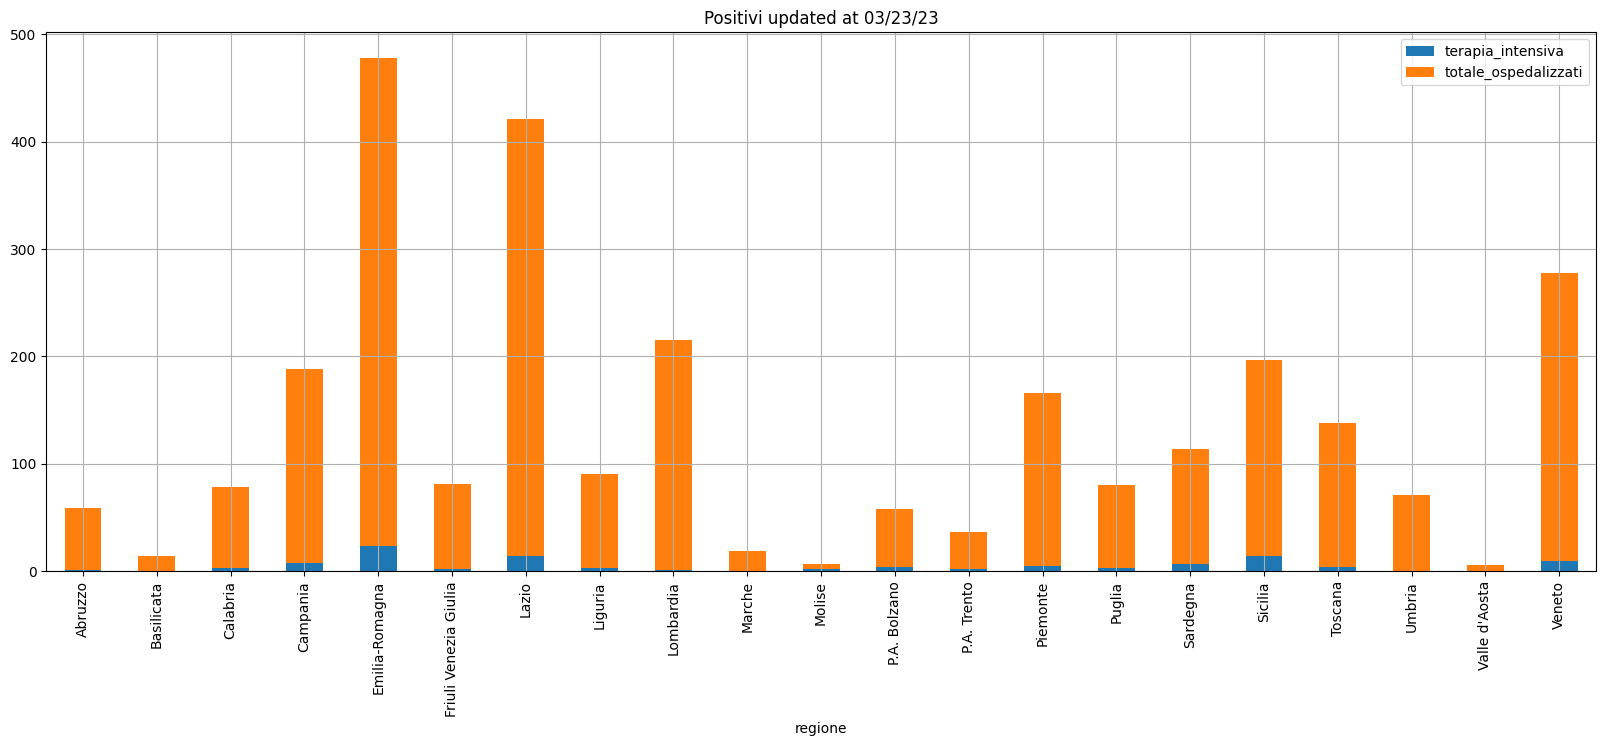

In [349]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [358]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2023-03-19 17:00:00   ITA                    2624                104   
2023-03-20 17:00:00   ITA                    2633                106   
2023-03-21 17:00:00   ITA                    2609                107   
2023-03-22 17:00:00   ITA                    2616                108   
2023-03-23 17:00:00   ITA                    2584                105   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2023-03-19 17:00:00                  2728                  138918   
2023-03-20 17:00:00                  2739                  137155   
2023-03-21 17:00:00                  2716                  137356   
2023-03-22 17:00:00                  2724                  136807   
2023-03-23 17:00:00                  2689                  135910   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2023-03-19 17:00:00           141646                        -536   
2023-03-20 17:00:00           139894                       -1752   
2023-03-21 17:00:00           140072                         178   
2023-03-22 17:00:00           139531                        -541   
2023-03-23 17:00:00           138599                        -932   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2023-03-19 17:00:00            2163         25329198    188802  ...   
2023-03-20 17:00:00            1179         25332107    188823  ...   
2023-03-21 17:00:00            5187         25337065    188869  ...   
2023-03-22 17:00:00            3865         25341435    188899  ...   
2023-03-23 17:00:00            3582         25345910    188933  ...   

                       tamponi  casi_testati  note  \
data                                                 
2023-03-19 17:00:00  269302631    68135189.0   NaN   
2023-03-20 17:00:00  269329460    68141477.0   NaN   
2023-03-21 17:00:00  269423714    68158739.0   NaN   
2023-03-22 17:00:00  269498920    68173291.0   NaN   
2023-03-23 17:00:00  269569208    68187924.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2023-03-19 17:00:00                        10.0        NaN       NaN   
2023-03-20 17:00:00                        10.0        NaN       NaN   
2023-03-21 17:00:00                        13.0        NaN       NaN   
2023-03-22 17:00:00                        10.0        NaN       NaN   
2023-03-23 17:00:00                         6.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2023-03-19 17:00:00                        9751343.0   
2023-03-20 17:00:00                        9751549.0   
2023-03-21 17:00:00                        9752715.0   
2023-03-22 17:00:00                        9753412.0   
2023-03-23 17:00:00                        9754070.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2023-03-19 17:00:00                              15908303.0   
2023-03-20 17:00:00                              15909275.0   
2023-03-21 17:00:00                              15913291.0   
2023-03-22 17:00:00                              15916453.0   
2023-03-23 17:00:00                              15919372.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2023-03-19 17:00:00              101041820.0                     168260811.0  
2023-03-20 17:00:00              101046716.0                     168282744.0  
2023-03-21 17:00:00  

In [357]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

KeyError: "['note_test', 'note_casi'] not found in axis"

In [352]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00         229
2020-02-25 18:00:00         322
2020-02-26 18:00:00         400
2020-02-27 18:00:00         650
2020-02-28 18:00:00         888
                         ...   
2023-03-19 17:00:00    25659646
2023-03-20 17:00:00    25660824
2023-03-21 17:00:00    25666006
2023-03-22 17:00:00    25669865
2023-03-23 17:00:00    25673442
Name: totale_casi, Length: 1124, dtype: int64

In [353]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00     26
2020-02-25 18:00:00     35
2020-02-26 18:00:00     36
2020-02-27 18:00:00     56
2020-02-28 18:00:00     64
                      ... 
2023-03-19 17:00:00    104
2023-03-20 17:00:00    106
2023-03-21 17:00:00    107
2023-03-22 17:00:00    108
2023-03-23 17:00:00    105
Name: terapia_intensiva, Length: 1124, dtype: int64

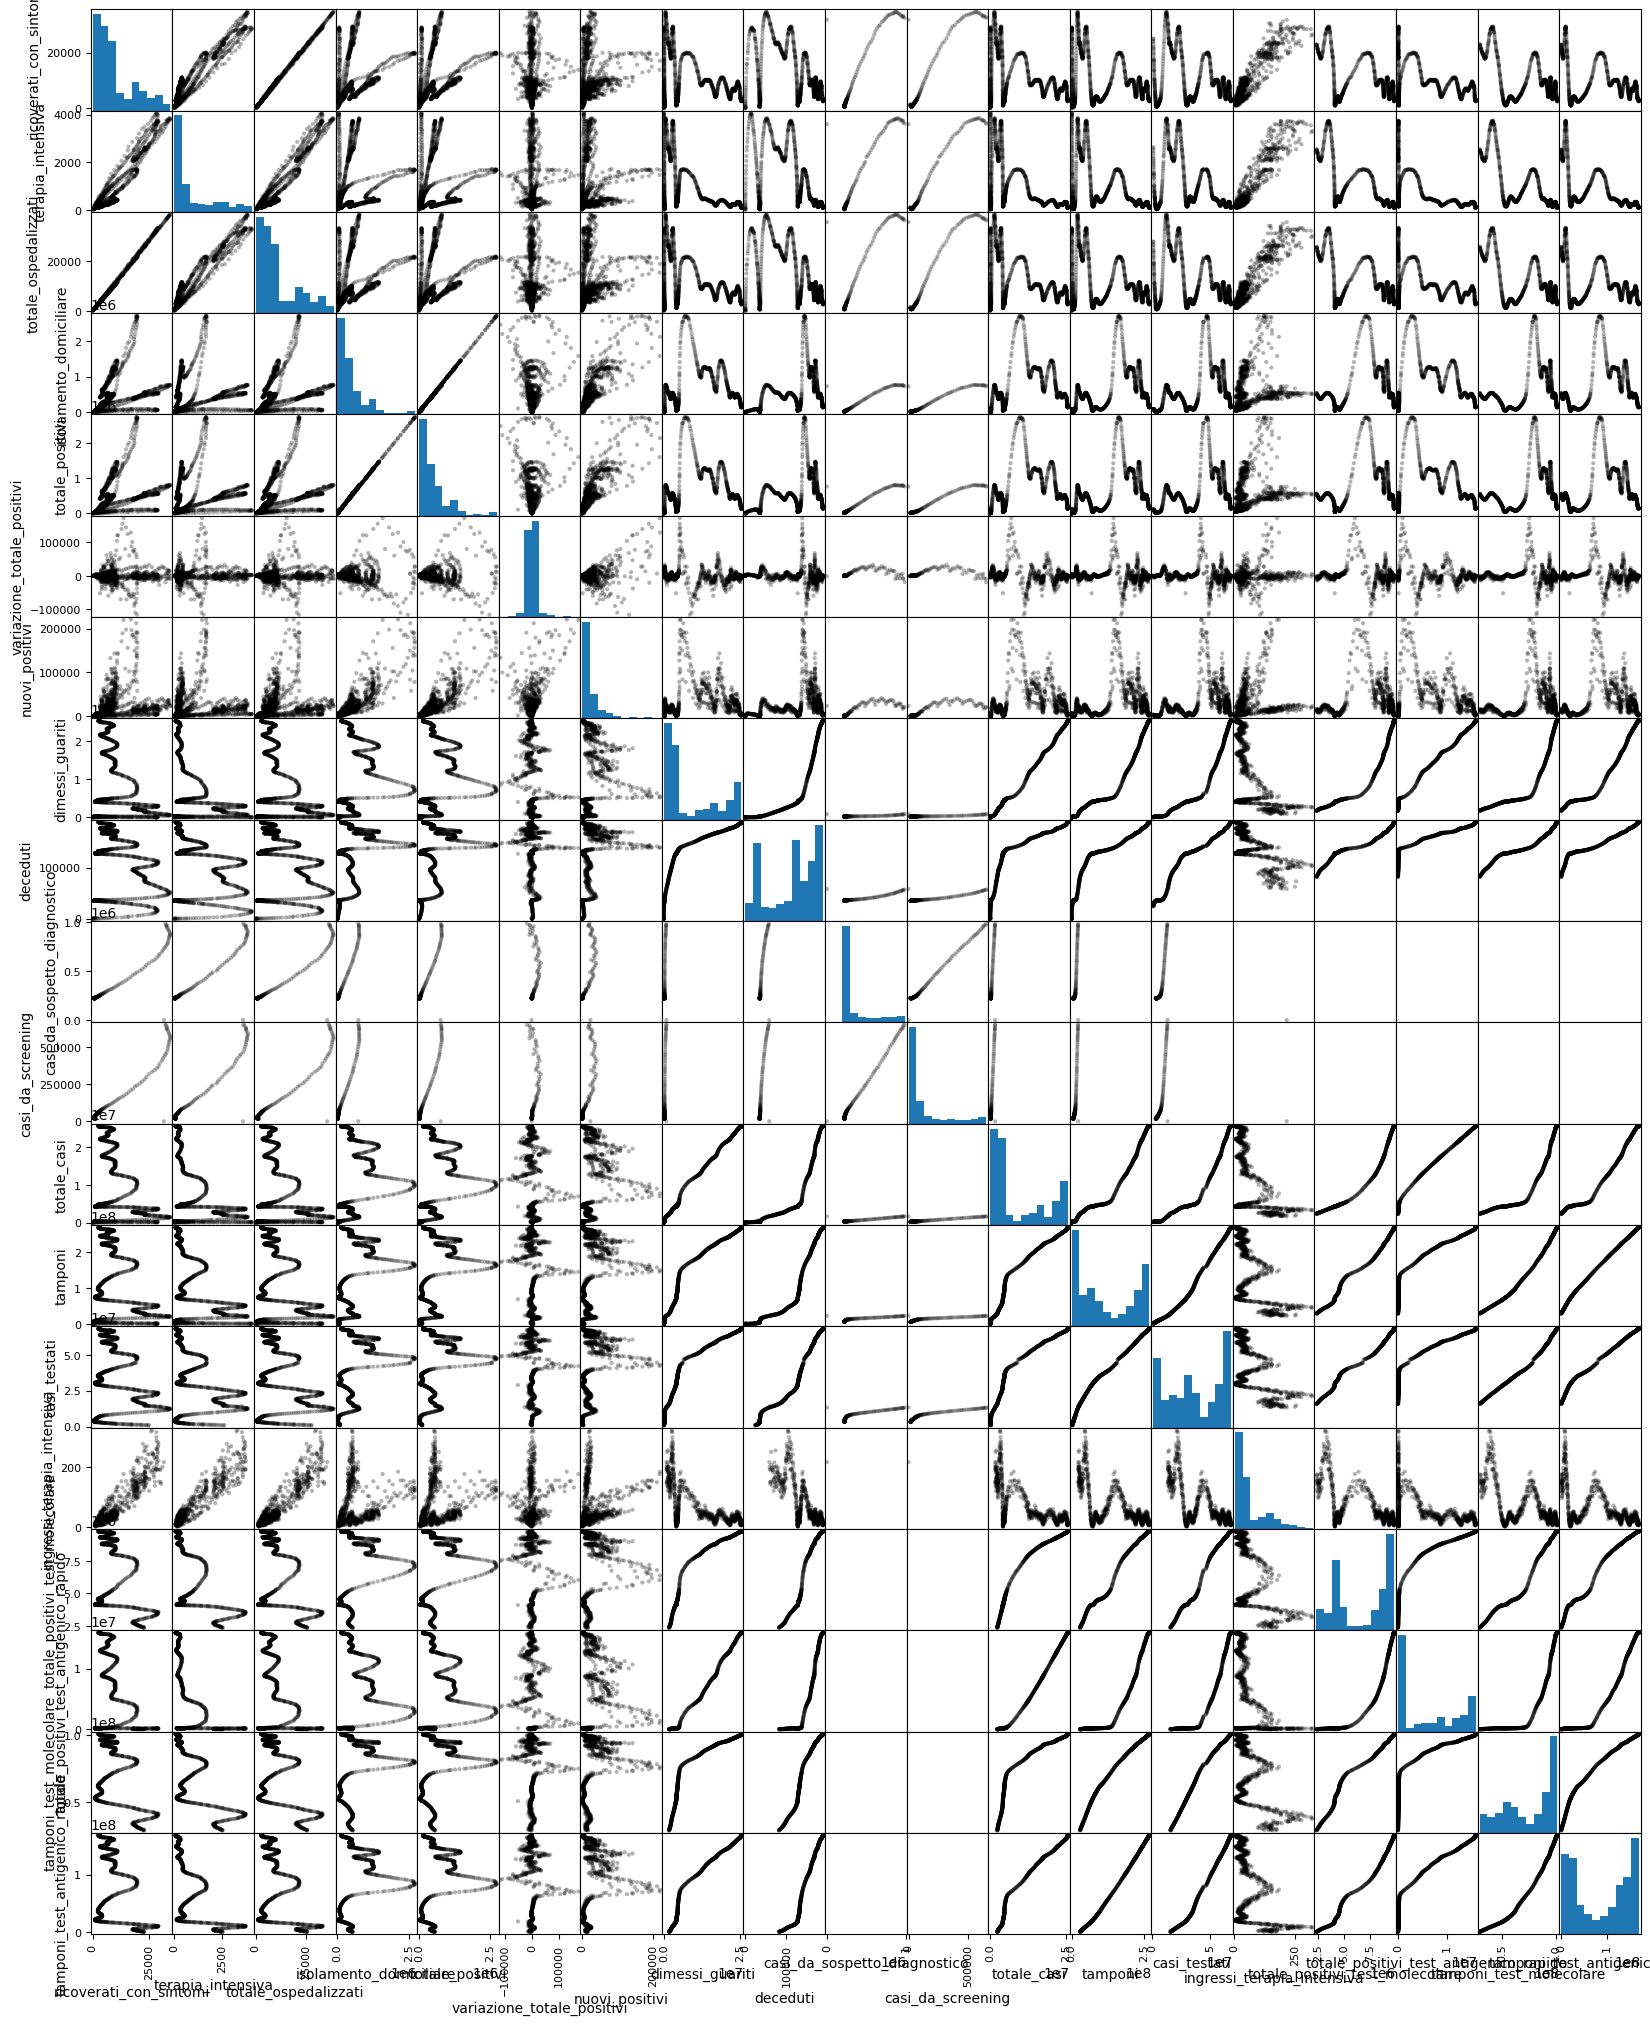

In [354]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [355]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido",\
             "tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

totale_positivi_test_molecolare  \
data                                                   
2020-02-24 18:00:00                              NaN   
2020-02-25 18:00:00                              NaN   
2020-02-26 18:00:00                              NaN   
2020-02-27 18:00:00                              NaN   
2020-02-28 18:00:00                              NaN   
...                                              ...   
2023-03-19 17:00:00                        9751343.0   
2023-03-20 17:00:00                        9751549.0   
2023-03-21 17:00:00                        9752715.0   
2023-03-22 17:00:00                        9753412.0   
2023-03-23 17:00:00                        9754070.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2020-02-24 18:00:00                                     NaN   
2020-02-25 18:00:00                                     NaN   
2020-02-26 18:00:00                                     NaN   
2020-02-27 18:00:00                                     NaN   
2020-02-28 18:00:00                                     NaN   
...                                                     ...   
2023-03-19 17:00:00                              15908303.0   
2023-03-20 17:00:00                              15909275.0   
2023-03-21 17:00:00                              15913291.0   
2023-03-22 17:00:00                              15916453.0   
2023-03-23 17:00:00                              15919372.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2020-02-24 18:00:00                      NaN                             NaN  
2020-02-25 18:00:00                      NaN                             NaN  
2020-02-26 18:00:00                      NaN                             NaN  
2020-02-27 18:00:00                      NaN                             NaN  
2020-02-28 18:00:00                      NaN                             NaN  
...                                      ...                             ...  
2023-03-19 17:00:00              101041820.0                     168260811.0  
2023-03-20 17:00:00              101046716.0                     168282744.0  
2023-03-21 17:00:00              101064519.0                     168359195.0  
2023-03-22 17:00:00              101080395.0                     168418525.0  
2023-03-23 17:00:00              101095057.0                     168474151.0  

[1124 rows x 4 columns]

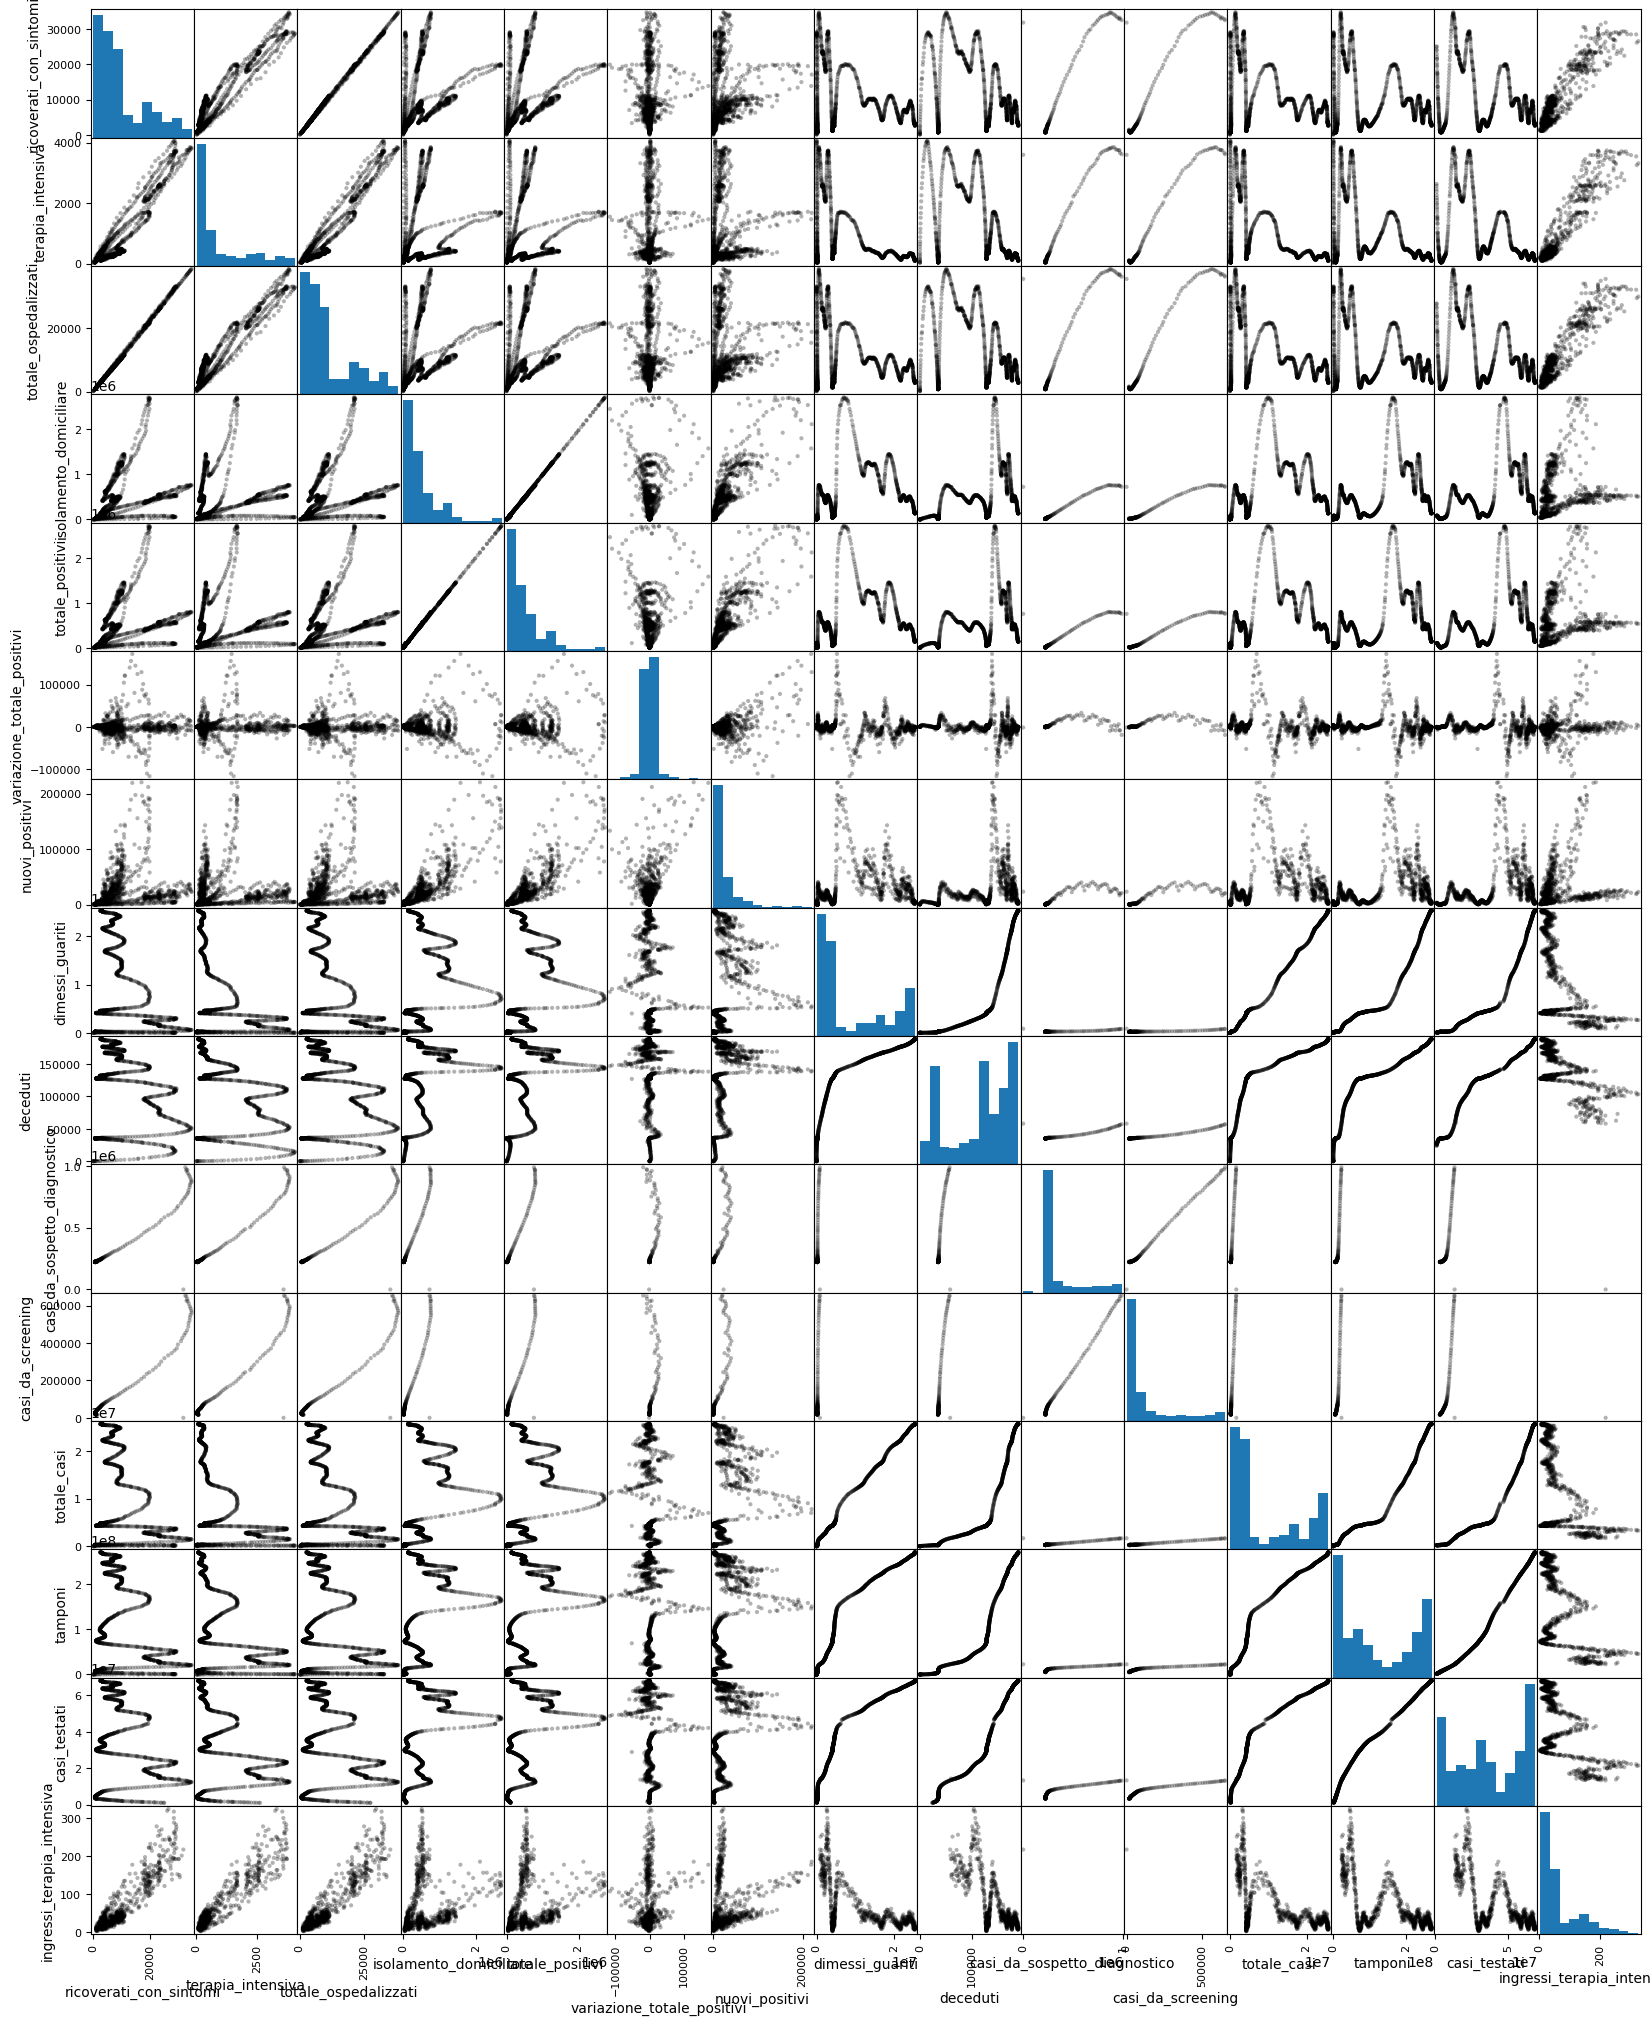

In [356]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()